In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Install necessary libraries
!pip install datasets transformers tqdm gradio timm deep_translator mpld3 langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 53.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.1 MB/s eta 0:00:00
  

In [3]:
# Import necessary libraries
from datasets import load_dataset, DatasetDict, Dataset
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm
"""
  - datasets: For loading and managing datasets.
  - pandas, numpy, re: For data manipulation and processing.
  - os: For interacting with the operating system.
  - tqdm: For visual feedback during data loading.

"""

# Load model and other necessary libraries
from transformers import AutoModel
import torch
import json
from PIL import Image
import io
import ast
"""
  - transformers: For working with pre-trained models from Hugging Face.
  - torch: For working with tensors, handling model computations and embeddings.
  - json: For working with JSON data.
  - PIL: For working with images.
  - io: For input/output operations.
  - ast: For abstract syntax trees.

"""

'\n  - transformers: For working with pre-trained models from Hugging Face.\n  - torch: For working with tensors, handling model computations and embeddings.\n  - json: For working with JSON data.\n  - PIL: For working with images.\n  - io: For input/output operations.\n  - ast: For abstract syntax trees.\n\n'

In [ ]:
# load the model locally
model = AutoModel.from_pretrained("./api/jina_clip_v1_model", trust_remote_code=True)
model = torch.load("./api/jina.pt")

In [4]:
# Load the model
model = AutoModel.from_pretrained("jinaai/jina-clip-v1", trust_remote_code=True)

# Set the device (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the model to the device
model.to(device)

"""
  - The pre-trained model from Hugging Face is loaded and set up for use in embedding calculations.
  - The model is moved to the appropriate device (GPU if available, otherwise CPU).

"""

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.93k [00:00<?, ?B/s]

configuration_clip.py:   0%|          | 0.00/11.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- configuration_clip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_clip.py:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

rope_embeddings.py:   0%|          | 0.00/5.79k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- rope_embeddings.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


eva_model.py:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- eva_model.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


transform.py:   0%|          | 0.00/14.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- transform.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


hf_model.py:   0%|          | 0.00/9.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- hf_model.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- modeling_clip.py
- rope_embeddings.py
- eva_model.py
- transform.py
- hf_model.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/891M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

configuration_bert.py:   0%|          | 0.00/5.77k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-bert-flash-implementation:
- configuration_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_bert.py:   0%|          | 0.00/33.4k [00:00<?, ?B/s]

bert_padding.py:   0%|          | 0.00/9.78k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-bert-flash-implementation:
- bert_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


block.py:   0%|          | 0.00/17.4k [00:00<?, ?B/s]

mlp.py:   0%|          | 0.00/8.05k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-bert-flash-implementation:
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mha.py:   0%|          | 0.00/35.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-bert-flash-implementation:
- mha.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-bert-flash-implementation:
- block.py
- mlp.py
- mha.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


embedding.py:   0%|          | 0.00/2.26k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-bert-flash-implementation:
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-bert-flash-implementation:
- modeling_bert.py
- bert_padding.py
- block.py
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


'\n  - The pre-trained model from Hugging Face is loaded and set up for use in embedding calculations.\n  - The model is moved to the appropriate device (GPU if available, otherwise CPU).\n\n'

# Another model

In [ ]:
%pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ajpi8nkm
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-ajpi8nkm
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [ ]:
## Input
### Import libraries
import torch
import clip
from PIL import Image

### Setup variables
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

image_path = "../../../../download.jpeg"
text_input = "your text description here"

## Model
### Preprocess the image and prepare the text
image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
text = clip.tokenize([text_input]).to(device)

### Generate embeddings
with torch.no_grad():
    image_embedding = model.encode_image(image)
    text_embedding = model.encode_text(text)

## Output
### Display embeddings
print("Image Embedding:", image_embedding.shape)
print("Text Embedding:", text_embedding.shape)

FileNotFoundError: [Errno 2] No such file or directory: '../../../../download.jpeg'

In [5]:
class RecipeDataProcessor:
    def __init__(self, dataset_names, kaggle_dataset_path):
        """
          - Initialize the processor with dataset names to load from Hugging Face and the path for the Kaggle dataset.
            :param dataset_names: Dictionary containing the dataset names from Hugging Face.
            :param kaggle_dataset_path: Path to the downloaded Kaggle dataset.

          - This constructor initializes the class with the names of the datasets to load from Hugging Face and Kaggle.
          - It sets up variables to store datasets and the final processed DataFrame.

        """
        self.dataset_names = dataset_names
        self.kaggle_dataset_path = kaggle_dataset_path
        self.datasets = []
        self.final_df = None

    def convert_string_to_dict(self, df, column_name):
        """
          - Convert a string representation of a dictionary into an actual dictionary.
            :param df: The DataFrame containing the string.
            :param column_name: The name of the column containing the string dictionary.
            :return: DataFrame with the column converted to dictionaries.

          - This method converts a string representation of a dictionary into an actual dictionary object, which is necessary when working with data that has been serialized as strings.

        """
        df[column_name] = df[column_name].apply(lambda x: eval(x) if isinstance(x, str) else x)
        return df

    def load_and_standardize_datasets(self):
        """
          - Load datasets from Hugging Face and Kaggle, then standardize them by renaming columns.

        """
        # Load datasets using Hugging Face's datasets library
        tokenized_recipes = load_dataset(self.dataset_names['tokenized_recipes'])['train'].to_pandas()
        tosoham_recipes = load_dataset(self.dataset_names['tosoham_recipes'])['train'].to_pandas()
        yasir_khan_recipes = load_dataset(self.dataset_names['yasir_khan_recipes'])['train'].to_pandas()
        indian_recipe = load_dataset("nf-analyst/indian_recipe")["train"].to_pandas()

        # Load Kaggle dataset using pandas
        kaggle_recipes = pd.read_csv(self.kaggle_dataset_path)

        # Convert the 'Image' column from string to dictionary
        tokenized_recipes = self.convert_string_to_dict(tokenized_recipes, 'image')

        # Check if the conversion was successful
        print(tokenized_recipes['image'].apply(type).head())

        # Drop the unnecessary columns in the dataset
        indian_recipe = indian_recipe.drop(["RecipeName", "Instructions", "Srno", "TotalTimeInMins", "Servings", "Ingredients"], axis=1)

        # Rename columns for consistency across all datasets
        indian_recipe = indian_recipe.rename(columns={
            'TranslatedInstructions': 'Instructions',
            'TranslatedRecipeName': 'Title',
            "CookTimeInMins":"Cook_Time",
            "PrepTimeInMins":"Prep_Time",
            "TranslatedIngredients":"Ingredients"
        })

        tokenized_recipes = tokenized_recipes.rename(columns={
            'title': 'Title',
            'ingredients': 'Ingredients',
            'directions': 'Instructions',
            'image': 'Image'
        })

        tosoham_recipes = tosoham_recipes.rename(columns={
            'title': 'Title',
            'text': 'Instructions',
            'image': 'Image',
            'image file': 'Image_File',
            'source url': 'Source_URL'
        })

        yasir_khan_recipes = yasir_khan_recipes.rename(columns={
            'name': 'Title',
            'cuisine': 'Cuisine',
            'course': 'Course',
            'diet': 'Diet',
            'ingredients_name': 'Ingredients',
            'ingredients_quantity': 'Ingredient_Quantity',
            'prep_time (in mins)': 'Prep_Time',
            'cook_time (in mins)': 'Cook_Time',
            'instructions': 'Instructions'
        })

        kaggle_recipes = kaggle_recipes.rename(columns={
            'Title': 'Title',
            'Ingredients': 'Ingredients',
            'Instructions': 'Instructions',
            'Image_Name': 'Image',
            'Cleaned_Ingredients': 'Cleaned_Ingredients'
        })

        # Combine all datasets into one
        self.datasets = [tokenized_recipes, tosoham_recipes, yasir_khan_recipes, kaggle_recipes, indian_recipe]

    def normalize_text(self, df, columns):
        """
          - Normalize text in specified columns of a dataframe.
            :param df: The dataframe to normalize.
            :param columns: List of columns to normalize.
            :return: The normalized dataframe.

          - This method converts the text in specified columns to lowercase and removes leading/trailing spaces.

        """
        for column in columns:
            if column in df.columns:
                df[column] = df[column].str.lower().str.strip()
        return df

    def preprocess_datasets(self):
        """
          - Preprocess the datasets by normalizing text, decoding images, and merging them into a single dataframe.
        """
        # Apply text normalization to specified columns in each dataset
        self.datasets[0] = self.normalize_text(self.datasets[0], ['Title', 'Ingredients', 'Instructions'])
        self.datasets[1] = self.normalize_text(self.datasets[1], ['Title', 'Instructions'])
        self.datasets[2] = self.normalize_text(self.datasets[2], ['Title', 'Ingredients', 'Ingredient_Quantity', 'Instructions'])
        self.datasets[3] = self.normalize_text(self.datasets[3], ['Title', 'Ingredients', 'Instructions'])
        self.datasets[4] = self.normalize_text(self.datasets[4], ['Title', 'Ingredients', 'Instructions'])

        # Merge datasets into a single DataFrame
        combined_df = pd.concat(self.datasets, ignore_index=True)

        # Handle missing values in 'Ingredients' and 'Instructions'
        combined_df['Ingredients'].fillna("Not Provided", inplace=True)
        combined_df['Instructions'].fillna("Not Provided", inplace=True)

        # Fill missing categorical data with 'Unknown' if the columns exist
        if 'Cuisine' in combined_df.columns:
            combined_df['Cuisine'] = combined_df['Cuisine'].fillna('Unknown')
        if 'Course' in combined_df.columns:
            combined_df['Course'] = combined_df['Course'].fillna('Unknown')
        if 'Diet' in combined_df.columns:
            combined_df['Diet'] = combined_df['Diet'].fillna('Unknown')
        if 'Difficulty' in combined_df.columns:
            combined_df['Difficulty'] = combined_df['Difficulty'].fillna('Unknown')

        self.final_df= combined_df[~combined_df.isin(['Unknown',"Not Provided"]).any(axis=1)]
        # self.final_df = combined_df

        # Delete the datasets variable to free up memory
        del self.datasets


    def regenerate_cleaned_ingredients(self):
        """
          - Regenerate the 'Cleaned_Ingredients' column by cleaning the 'Ingredients' data.
        """
        def clean_ingredient_list(ingredients):
            if pd.isnull(ingredients):
                return np.nan

            # Convert to lowercase
            ingredients = ingredients.lower()

            # Remove brackets and quotes
            ingredients = re.sub(r'\[|\]|\"|\'', '', ingredients)

            # Remove quantities and measurements
            ingredients = re.sub(r'\d+/\d+|\d+|\b(cup|cups|tsp|tbsp|teaspoon|tablespoon|teaspoons|tablespoons|ounce|oz|pound|lb|g|kg|ml|liter|litre|a|inch|good|combination|with|or|and|by|in|on|at|long|large|about|also|drops|ounces|each|every|for|pounds|accompaniment|all purpose|allpurpose|any|grams|more|plus|to|small|sliced)\b', '', ingredients)

            # Remove any other non-alphabetical characters
            ingredients = re.sub(r'[^a-zA-Z\s,]', '', ingredients)

            # Remove extra spaces and standardize
            ingredients = re.sub(r'\s+', ' ', ingredients).strip()

            # Split ingredients by comma and remove duplicates
            ingredient_list = list(set([ingredient.strip() for ingredient in ingredients.split(',')]))

            # Return as a comma-separated string
            return ', '.join(ingredient_list)

        # Apply the cleaning function to the Ingredients column to generate the Cleaned_Ingredients column
        self.final_df['Cleaned_Ingredients'] = self.final_df['Ingredients'].apply(clean_ingredient_list)

        # Split the ingredient strings into lists of individual ingredients and stripping any leading/trailing spaces, ensuring a standardized and clean format for each ingredient in the dataset.
        self.final_df['Cleaned_Ingredients']=self.final_df['Cleaned_Ingredients'].apply(
            lambda ingredients: [ingredient.strip() for ingredient in ingredients.split(',')]
        )

        # Check for any remaining missing values in Cleaned_Ingredients
        print(f"Missing values in 'Cleaned_Ingredients': {self.final_df['Cleaned_Ingredients'].isnull().sum()}")

    def downsample_df(self, df, columns, n):
        """
          - Downsample the DataFrame based on the specified columns and sample size.
            :param df: The DataFrame to downsample.
            :param columns: List of columns to downsample by.
            :param n: Number of samples to keep per category.
            :return: Downsampled DataFrame.

          - This method is used to downsample the DataFrame based on specific columns to ensure a balanced dataset.
          - It reduces the number of rows in each category to a manageable size for efficient processing.

        """
        sampled_df_list = []
        for col in columns:
            sampled_df = df.groupby(col).apply(lambda x: x.sample(min(len(x), n)))
            sampled_df_list.append(sampled_df)

        # Combine all sampled DataFrames and drop duplicates
        sampled_df_list = [x.reset_index(drop=True) for x in sampled_df_list]
        combined_sampled_df = pd.concat(sampled_df_list)

        # Drop duplicates based on the 'ID' column to ensure that each recipe is represented only once in the final dataset.
        return combined_sampled_df.drop_duplicates(subset="ID")

    def downsample_by_ingredients(self, df, col, n):
        """
          - Downsample the DataFrame based on unique ingredients.
            :param df: The DataFrame to downsample.
            :param col: Column containing the ingredients list.
            :param n: Number of unique ingredients to retain.
            :return: Downsampled DataFrame.

          - This method further downsamples the DataFrame based on unique ingredients, ensuring that the final dataset contains a diverse range of ingredient combinations.

        """
        unique_ingredients = set()
        filtered_rows = []

        for _, row in df.iterrows():
            ingredients = row[col]
            ingredient_list = ingredients.replace(" ", "").split(',') if isinstance(ingredients, str) else ingredients

            # Filter the ingredients that have not yet been added to the unique_ingredients set
            new_ingredients = [ingredient for ingredient in ingredient_list if ingredient not in unique_ingredients]

            if new_ingredients:
                # Update the set with the new unique ingredients
                unique_ingredients.update(new_ingredients)
                filtered_rows.append(row)

        # Create a new DataFrame from the filtered rows
        filtered_df = pd.DataFrame(filtered_rows)
        return filtered_df

    def finalize_dataset(self):
        """
          - Finalize and clean the combined dataset.
          - This method finalizes the dataset by regenerating cleaned ingredients, downsampling the DataFrame, and setting up the final column order for the data to be used in the recommendation system.

        """
        # Handle missing values in 'Prep_Time' and 'Cook_Time' by replacing the missing values with the median of each column

        if 'Prep_Time' in self.final_df.columns and 'Cook_Time' in self.final_df.columns:
            self.final_df['Prep_Time'] = self.final_df['Prep_Time'].fillna(self.final_df['Prep_Time'].median())
            self.final_df['Cook_Time'] = self.final_df['Cook_Time'].fillna(self.final_df['Cook_Time'].median())

        # Regenerate Cleaned_Ingredients
        self.regenerate_cleaned_ingredients()

        # Insert the ID column early in the process
        try:
          self.final_df.drop("ID",axis=1,inplace=True)
        except:
          pass
        self.final_df.insert(0, 'ID', range(len(self.final_df)))

        # Downsample the DataFrame
        final_columns = ['Cuisine', 'Course', 'Diet']
        smaller_df = self.downsample_df(self.final_df, final_columns, 10)
        sample_by_ing = self.downsample_by_ingredients(self.final_df, 'Cleaned_Ingredients', 10)
        self.final_df = pd.concat([smaller_df, sample_by_ing]).drop_duplicates(subset="ID")

        # Drop the original 'Ingredients' column
        self.final_df = self.final_df.drop(columns=['Ingredients'], errors='ignore')

        # Define the final column order
        final_columns = ['ID', 'Title', 'Cleaned_Ingredients', 'Instructions', 'Prep_Time', 'Cook_Time',
                        'Serves', 'Difficulty', 'Cuisine', 'Course', 'Diet', 'Image', 'Description', 'URL']

        # Reorder the columns in the final DataFrame
        self.final_df = self.final_df[[col for col in final_columns if col in self.final_df.columns]]


    def validate_dataset(self):
        """
          - Validate the final dataset by checking for duplicates and null values.
          - This method validates the final dataset by checking for duplicates, null values, and ensuring the data is consistent.

        """
        # Remove duplicates based on the 'Title' column
        if 'Title' in self.final_df.columns:
            self.final_df = self.final_df.drop_duplicates(subset=['Title'])

        # Basic data validation checks
        print("Number of recipes:", len(self.final_df))

        if 'Title' in self.final_df.columns:
            print("Number of unique titles:", self.final_df['Title'].nunique())

        print(self.final_df.isnull().sum())

        # Sample data to ensure correctness
        print(self.final_df.head())


    def extract_distinct_ingredients(self):
        """
          - Extract distinct ingredients from the 'Cleaned_Ingredients' column, which can be used for filtering and recommending recipes.
            :return: List of distinct ingredients.

        """
        # Initialize a set to store unique ingredients
        distinct_ingredients = set()

        # Loop through each row in the 'Cleaned_Ingredients' column
        for ingredients_list in self.final_df['Cleaned_Ingredients']:
            # Ensure the list is not empty
            if ingredients_list:
                # Add each ingredient to the set
                distinct_ingredients.update(ingredients_list)

        # Convert the set to a sorted list
        distinct_ingredients = sorted(list(distinct_ingredients))

        return distinct_ingredients


    def save_dataset(self, file_name, sample_size=1000):
        """
          - Save a sample of the final dataframe to a CSV file.
            :param file_name: Name of the CSV file to save.
            :param sample_size: Number of samples to save.

        """
        # Sample the dataframe

        # self.final_df = self.final_df.sample(n=sample_size, random_state=42)
        self.final_df.to_csv(file_name, index=False)
        print(f"Sample dataset saved to {file_name}")

    def calculate_embeddings(self, file_name='./drive/MyDrive/embeddings.json', sample_size=1000):
        """
          - Calculate embeddings for titles and images in the DataFrame and save them to a JSON file.
            :param file_name: Path to the JSON file where embeddings will be saved.
            :param sample_size: Number of samples for which embeddings will be calculated.

          - This method calculates embeddings for the titles and images in the dataset using the pre-trained model.
          - These embeddings are then stored in a JSON file, which will be used later for matching and recommending recipes.

        """
        sample_df = self.final_df#.head(sample_size)  # Use the first 10k samples

        embeddings = {}
        for index, row in tqdm(sample_df.iterrows(), total=len(sample_df)):
            title_text = row['Title']
            # Convert the text to a PyTorch tensor and move it to the device
            title_inputs = torch.tensor(model.encode_text(title_text)).to(device)
            title_embedding = title_inputs.cpu().numpy().tolist()

            # Handle image embedding if the image is available
            if not pd.isna(row['Image']):
                try:
                    print("Processing image for ID:", row['ID'])
                    base64_string = row["Image"]["bytes"]
                    image = Image.open(io.BytesIO(base64_string))
                    image_inputs = torch.tensor(model.encode_image(image)).to(device)
                    image_embedding = image_inputs.cpu().numpy().tolist()
                    final_embedding = [(x + y) / 2 for x, y in zip(title_embedding, image_embedding)]
                except Exception as e:
                    print(f"Error processing image for ID {row['ID']}: {e}")
                    final_embedding = title_embedding
            else:
                final_embedding = title_embedding

            # Save with ID as the key
            embeddings[row['ID']] = final_embedding

        # Save the embeddings to a JSON file
        with open(file_name, 'w') as f:
            json.dump(embeddings, f)
        print(f"Embeddings saved successfully to {file_name}.")

    def process(self):
        """
          - The main process flow: Load, preprocess, finalize, validate, and save the dataset, and then calculate embeddings.
        """
        self.load_and_standardize_datasets()
        self.preprocess_datasets()
        self.finalize_dataset()
        self.validate_dataset()
        self.save_dataset('./drive/MyDrive/data.csv', sample_size=100)
        self.calculate_embeddings()




In [6]:
# Main execution
if __name__ == "__main__":
    # Define the dataset names for each dataset from Hugging Face
    dataset_names = {
        'tokenized_recipes': 'umarigan/recipe_dataset_tokenized',
        'tosoham_recipes': 'tosoham/recipe-dataset',
        'yasir_khan_recipes': 'Yasir-khan/Recipe_Generation_Dataset'
    }

    # Define the path to the Kaggle dataset CSV file
    kaggle_dataset_path = './drive/MyDrive/food.csv'

    # Create an instance of the RecipeDataProcessor class
    processor = RecipeDataProcessor(dataset_names, kaggle_dataset_path)

    # Execute the processing workflow
    processor.process()

Generating train split:   0%|          | 0/82303 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/100 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/1065 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/6871 [00:00<?, ? examples/s]

0    <class 'dict'>
1    <class 'dict'>
2    <class 'dict'>
3    <class 'dict'>
4    <class 'dict'>
Name: image, dtype: object
Missing values in 'Cleaned_Ingredients': 0
Number of recipes: 5071
Number of unique titles: 5071
ID                        0
Title                     0
Cleaned_Ingredients       0
Instructions              0
Prep_Time                 0
Cook_Time                 0
Cuisine                   0
Course                    0
Diet                      0
Image                  5071
URL                     421
dtype: int64
     ID                                              Title  \
0  4529  lavand-e-murgh recipe - afghani chicken in yog...   
1  5978   malida recipe (healthy whole wheat afghan sweet)   
2  4640  afghani dhoog recipe - cucumber mint buttermil...   
3  7092     moroccan spiced millet and lentil salad recipe   
4  4388            spicy moroccan rice with chicken recipe   

                                 Cleaned_Ingredients  \
0  [badam almond blanched 

  0%|          | 0/5071 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/1.24k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

100%|██████████| 5071/5071 [01:43<00:00, 49.14it/s]


Embeddings saved successfully to ./drive/MyDrive/embeddings.json.


In [ ]:
unique_ingredients = processor.extract_distinct_ingredients()
print("Unique Ingredients:", unique_ingredients)

# The next 2 cells are prompting chatgpt api and hugging face models, to extract the ingredient name from a given string

In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3.5-mini-instruct", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained("microsoft/Phi-3.5-mini-instruct", trust_remote_code=True)
# # Load model directly
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("rchiang/ingredients-parser")
model = AutoModelForSeq2SeqLM.from_pretrained("rchiang/ingredients-parser")
# Function to generate text based on a prompt
def generate_ingredients_prompt(prompt, max_length=550):
    inputs = tokenizer.encode(prompt, return_tensors="pt")
    outputs = model.generate(inputs)
    return tokenizer.decode(outputs[0])

# Model
def extract_ingredients(text):
    prompt = f'''
You are an expert in identifying ingredients from text. Your task is to extract the ingredient name from a given text.
Please ensure that no numbers, quantities, measurements, or additional descriptors are included in the output.
Only the name of the ingredient should be returned.

Instructions:
1. Extract only the core ingredient name.
2. Remove all numbers, units of measurement, and descriptors.
3. If the text does not contain an ingredient, return "none".

Examples:
text: 1 cup of sugar
output: sugar

text: 2 tablespoons of olive oil
output: olive oil

text: 3 cloves of garlic, minced
output: garlic

text: A pinch of salt
output: salt

text: green bell pepper capsicum chopped
output: bell pepper

text: coriander powder dhania roughly pounded
output: coriander powder

text: plain yogurt preferably whole milk
output: yogurt

text: 200 grams of diced chicken breast
output: chicken breast

text: 4 slices of bacon, cooked and crumbled
output: bacon

text: 5 cups of fresh spinach, washed and chopped
output: spinach

text: 250 ml of vegetable broth
output: vegetable broth

text: 2 medium-sized onions, diced
output: onions

text: 6 ripe tomatoes, finely chopped
output: tomatoes

text: cut diagonal into thick slices
output: none

text: thinly sliced
output: none

text: mix until well combined
output: none

text: preheat the oven to 350°F
output: none

text: sauté until golden brown
output: none

text: bake for 20 minutes or until done
output: none

text: stir continuously to avoid burning
output: none

text: let it rest for 10 minutes
output: none

text: garnish with chopped herbs
output: none

text: serve hot with a side of bread
output: none

text: refrigerate leftovers for up to 3 days
output: none

the output must be  fewer than 5 words

text:{text}
output:
'''
    result = generate_ingredients_prompt(prompt)
    return result

# Function to process a list of strings
def extract_ingredients_from_list(strings):
    return [extract_ingredients(text) for text in strings]

In [ ]:
import openai

# Set up the OpenAI API key
openai.api_key = "your_openai_api_key"

# Define the function to generate text based on a prompt
def generate_ingredients_prompt(prompt, max_length=550):
    response = openai.Completion.create(
        engine="gpt-4",
        prompt=prompt,
        max_tokens=max_length,
        n=1,
        stop=None,
        temperature=0.7,
    )

    return response.choices[0].text.strip()

# Define the function to extract ingredients
def extract_ingredients(text):
    prompt = f'''
You are an expert in identifying ingredients from text. Your task is to extract the ingredient name from a given text.
Please ensure that no numbers, quantities, measurements, or additional descriptors are included in the output.
Only the name of the ingredient should be returned.

Instructions:
1. Extract only the core ingredient name.
2. Remove all numbers, units of measurement, and descriptors.
3. If the text does not contain an ingredient, return "none".

Examples:
text: 1 cup of sugar
output: sugar

text: 2 tablespoons of olive oil
output: olive oil

text: 3 cloves of garlic, minced
output: garlic

text: A pinch of salt
output: salt

text: green bell pepper capsicum chopped
output: bell pepper

text: coriander powder dhania roughly pounded
output: coriander powder

text: plain yogurt preferably whole milk
output: yogurt

text: 200 grams of diced chicken breast
output: chicken breast

text: 4 slices of bacon, cooked and crumbled
output: bacon

text: 5 cups of fresh spinach, washed and chopped
output: spinach

text: 250 ml of vegetable broth
output: vegetable broth

text: 2 medium-sized onions, diced
output: onions

text: 6 ripe tomatoes, finely chopped
output: tomatoes

text: cut diagonal into thick slices
output: none

text: thinly sliced
output: none

text: mix until well combined
output: none

text: preheat the oven to 350°F
output: none

text: sauté until golden brown
output: none

text: bake for 20 minutes or until done
output: none

text: stir continuously to avoid burning
output: none

text: let it rest for 10 minutes
output: none

text: garnish with chopped herbs
output: none

text: serve hot with a side of bread
output: none

text: refrigerate leftovers for up to 3 days
output: none

the output must be fewer than 5 words

text:{text}
output:
'''
    result = generate_ingredients_prompt(prompt)
    return result

# Function to process a list of strings
def extract_ingredients_from_list(strings):
    return [extract_ingredients(text) for text in strings]

# Analysis

In [18]:
df = pd.read_csv("./drive/MyDrive/data.csv")

In [20]:
df = df.drop(columns=['URL'], errors='ignore')

In [21]:
# df.to_csv("./drive/MyDrive/data.csv", index=False)

In [22]:
df.head()

,ID,Title,Cleaned_Ingredients,Instructions,Prep_Time,Cook_Time,Cuisine,Course,Diet,Image
0,4529,lavand-e-murgh recipe - afghani chicken in yog...,"['badam almond blanched optional', 'salt taste...","to begin making the lavand-e-murgh recipe, was...",15.0,25.0,Afghan,Dinner,High Protein Non Vegetarian,NaN
1,5978,malida recipe (healthy whole wheat afghan sweet),"['dates pitted finely chopped', 'leftover roti...","to begin making the malida recipe, tear the ro...",20.0,20.0,Afghan,Snack,Vegetarian,NaN
2,4640,afghani dhoog recipe - cucumber mint buttermil...,"['salt taste', 'ice cubes few', 'cumin powder ...",to begin making the afghani dhoog recipe - cuc...,10.0,0.0,Afghan,Snack,Vegetarian,NaN
3,7092,moroccan spiced millet and lentil salad recipe,['ras el hanout spice blend moroccan spice ble...,to begin making the moroccan spiced millet and...,10.0,20.0,African,Dinner,Vegetarian,NaN
4,4388,spicy moroccan rice with chicken recipe,"['red chilli powder', 'dry ginger powder', 'on...",to prepare spicy moroccan rice with chicken re...,30.0,20.0,African,Main Course,High Protein Non Vegetarian,NaN


# **Cuisine Distribution:**

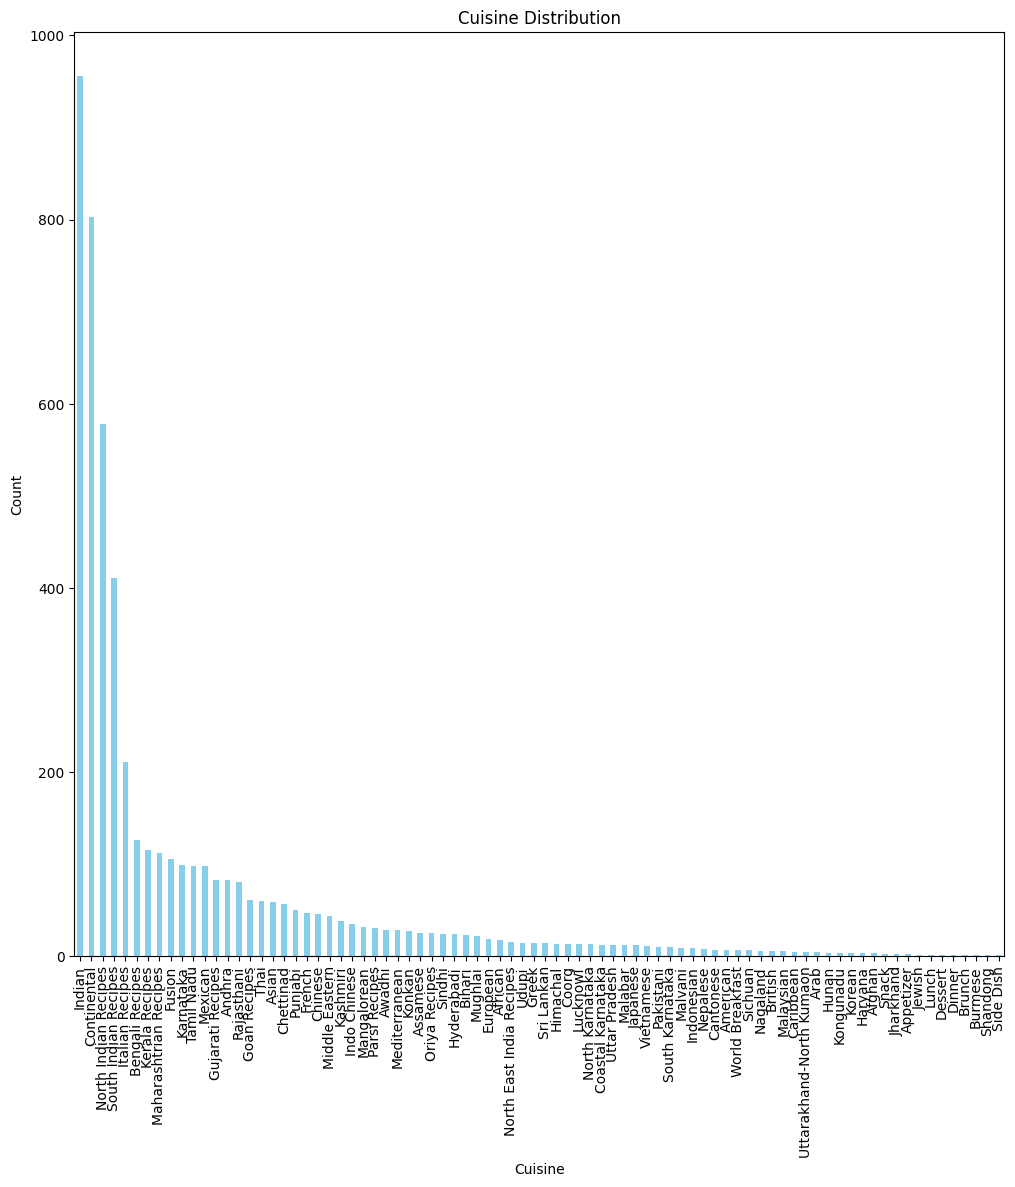

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
df['Cuisine'].value_counts().plot(kind='bar', title='Cuisine Distribution', color='skyblue')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###Observations:
- After carefully plotting a bar chart for the distribution of the different cuisine types in our dataset, we noticed that the most 2 common cuisine types in our dataset are the Indian cuisine, followed by the Continental cuisine.
- We also observed other common cuisines such as North Indian Recipes and South Indian Recipes.
- The other cuisine types are less common in our dataset

In [24]:
df['Cuisine'].nunique()

82

###Observations:
- We have 82 different cuisine types in our dataset.

In [26]:
df['Cuisine'].unique()

array(['Afghan', 'African', 'American', 'Andhra', 'Appetizer', 'Arab',
       'Asian', 'Assamese', 'Awadhi', 'Bengali Recipes', 'Bihari',
       'British', 'Brunch', 'Burmese', 'Cantonese', 'Caribbean',
       'Chettinad', 'Chinese', 'Coastal Karnataka', 'Continental',
       'Coorg', 'Dessert', 'Dinner', 'European', 'French', 'Fusion',
       'Goan Recipes', 'Greek', 'Gujarati Recipes\ufeff', 'Haryana',
       'Himachal', 'Hunan', 'Hyderabadi', 'Indian', 'Indo Chinese',
       'Indonesian', 'Italian Recipes', 'Japanese', 'Jewish', 'Jharkhand',
       'Karnataka', 'Kashmiri', 'Kerala Recipes', 'Kongunadu', 'Konkan',
       'Korean', 'Lucknowi', 'Lunch', 'Maharashtrian Recipes', 'Malabar',
       'Malaysian', 'Malvani', 'Mangalorean', 'Mediterranean', 'Mexican',
       'Middle Eastern', 'Mughlai', 'Nagaland', 'Nepalese',
       'North East India Recipes', 'North Indian Recipes',
       'North Karnataka', 'Oriya Recipes', 'Pakistani', 'Parsi Recipes',
       'Punjabi', 'Rajasthani', 'Sha

###Observations:
- Reading the different values of cuisine types, we found some of them that are not correctly labeled. There are some values in the cuisine column that are not actually a cuisine type.
- Therefore, in the below code, we decided to drop these incorrect values.

In [27]:
df['Cuisine'].value_counts()

,count
Cuisine,
Indian,956
Continental,803
North Indian Recipes,578
South Indian Recipes,411
Italian Recipes,211
...,...
Dinner,1
Brunch,1
Burmese,1


###Observations:
- This step is done to carefully examine the number of occurence of each cuisine types.
- We found out that the Indian cuisine is the most common, we have 942 Indian recipes.
- As for the Continental cuisine, we have 805 recipes of this cuisine type.
- We can see that the North Indian Recipes and South Indian Recipes are also common cuisine types but their occurence seems to be less than the Indian and Continental cuisines.

In [28]:
# Define a list of non-cuisine values
non_cuisine_values = [
    'Appetizer', 'Brunch', 'Dessert', 'Dinner', 'Fusion',
    'Lunch', 'Side Dish', 'Snack', 'World Breakfast'
]

# Filter the DataFrame to drop rows with non-cuisine values
df = df[~df['Cuisine'].isin(non_cuisine_values)]

In [29]:
# Save the filtered DataFrame
# df.to_csv("./drive/MyDrive/data.csv", index=False)

# After dropping the incorrect cuisine types:

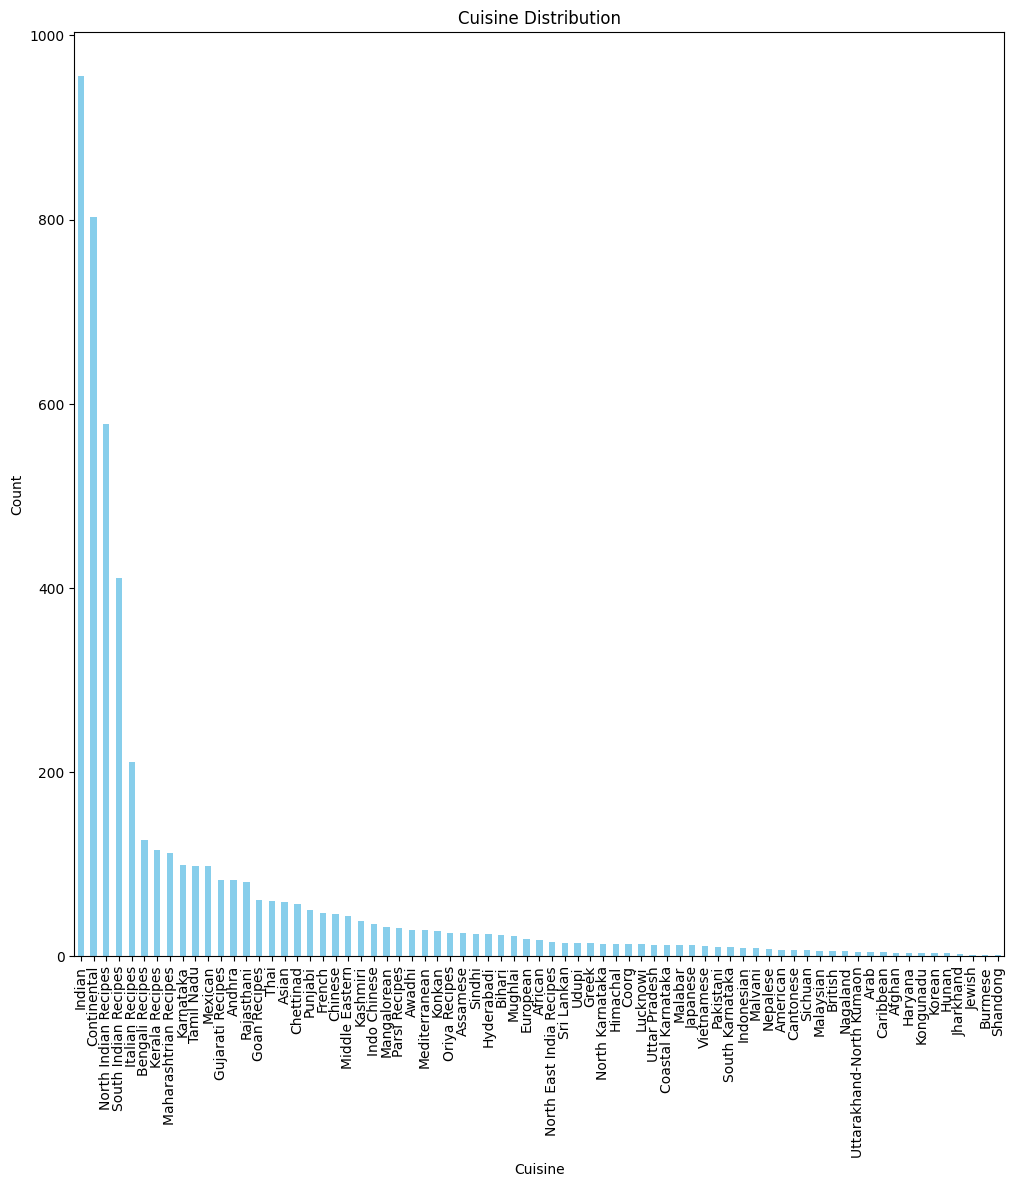

In [30]:
plt.figure(figsize=(12,12))
df['Cuisine'].value_counts().plot(kind='bar', title='Cuisine Distribution', color='skyblue')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [31]:
df['Cuisine'].unique()

array(['Afghan', 'African', 'American', 'Andhra', 'Arab', 'Asian',
       'Assamese', 'Awadhi', 'Bengali Recipes', 'Bihari', 'British',
       'Burmese', 'Cantonese', 'Caribbean', 'Chettinad', 'Chinese',
       'Coastal Karnataka', 'Continental', 'Coorg', 'European', 'French',
       'Goan Recipes', 'Greek', 'Gujarati Recipes\ufeff', 'Haryana',
       'Himachal', 'Hunan', 'Hyderabadi', 'Indian', 'Indo Chinese',
       'Indonesian', 'Italian Recipes', 'Japanese', 'Jewish', 'Jharkhand',
       'Karnataka', 'Kashmiri', 'Kerala Recipes', 'Kongunadu', 'Konkan',
       'Korean', 'Lucknowi', 'Maharashtrian Recipes', 'Malabar',
       'Malaysian', 'Malvani', 'Mangalorean', 'Mediterranean', 'Mexican',
       'Middle Eastern', 'Mughlai', 'Nagaland', 'Nepalese',
       'North East India Recipes', 'North Indian Recipes',
       'North Karnataka', 'Oriya Recipes', 'Pakistani', 'Parsi Recipes',
       'Punjabi', 'Rajasthani', 'Shandong', 'Sichuan', 'Sindhi',
       'South Indian Recipes', 'South Kar

###Observations:
- These are the different cuisine types after cleaning the data, we can see that all the available types are actually cuisine types.

In [32]:
df['Cuisine'].nunique()

73

###Observations:
- We have 72 unique cuisine types after cleaning the data, indicating the diversity in our dataset.

In [33]:
# Rename the 'Gujarati Recipes\ufeff' value in the 'Cuisine' column to 'Gujarati Recipes'
df = df.replace({'Cuisine': {'Gujarati Recipes\ufeff': 'Gujarati Recipes'}})

# **Course Distribution:**

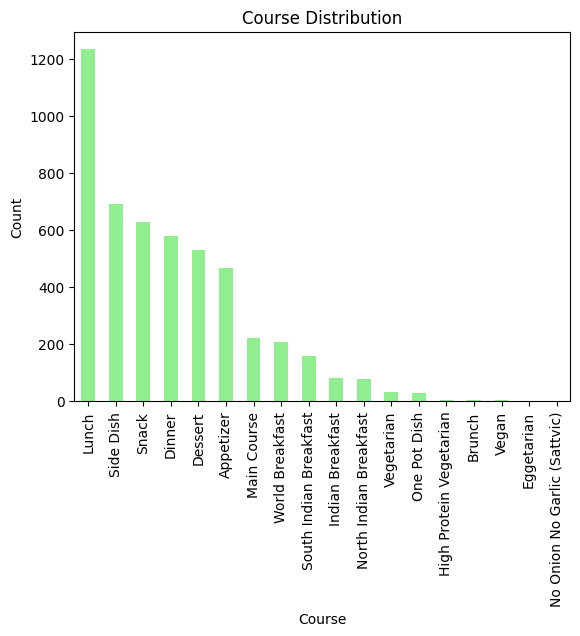

In [34]:
df['Course'].value_counts().plot(kind='bar', title='Course Distribution', color='lightgreen')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###Observations:
- By plotting a bar chart for the distribution of the different course types in our dataset, we noticed that the most common course type in our dataset is the Lunch course.
- The other course types are less common in our dataset.

In [35]:
df['Course'].nunique()

18

###Observations:
- We have 18 unique course types.

In [36]:
df['Course'].unique()

array(['Dinner', 'Snack', 'Main Course', 'World Breakfast', 'Appetizer',
       'Vegetarian', 'Side Dish', 'Dessert', 'One Pot Dish', 'Lunch',
       'South Indian Breakfast', 'North Indian Breakfast', 'Brunch',
       'Indian Breakfast', 'No Onion No Garlic (Sattvic)', 'Eggetarian',
       'High Protein Vegetarian', 'Vegan'], dtype=object)

###Observations:
- Reading the different values of course types, we found some of them that are not correctly labeled. There are some values in the course column that are not actually a course type.
- Therefore, in the below code, we decided to drop these incorrect values.

In [37]:
# List of valid course types
valid_courses = [
    'Appetizer', 'Main Course', 'Dessert', 'Side Dish', 'One Pot Dish', 'Dinner',
    'Snack', 'South Indian Breakfast', 'World Breakfast', 'Lunch', 'North Indian Breakfast',
    'Brunch', 'Indian Breakfast'
]

# Remove rows where the Course column does not contain a valid course
df = df[df['Course'].isin(valid_courses)]

In [38]:
# Save the updated DataFrame
df.to_csv("./drive/MyDrive/dataCleaned.csv", index=False)

In [40]:
df.shape

(4909, 10)

# This is the distribution of the course types after cleaning the data.

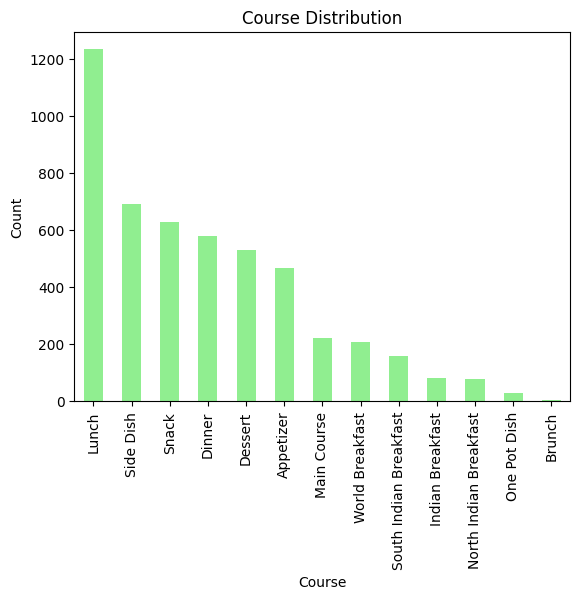

In [39]:
df['Course'].value_counts().plot(kind='bar', title='Course Distribution', color='lightgreen')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###Observations:
- These are the different course types after cleaning the data, we can see that all the available types are actually course types.

In [41]:
df['Course'].nunique()

13

###Observations:
- Now after cleaning the data, we can see that there exist 13 different course type.

In [42]:
df['Course'].value_counts()

,count
Course,
Lunch,1233
Side Dish,690
Snack,629
Dinner,580
Dessert,531
Appetizer,467
Main Course,223
World Breakfast,206
South Indian Breakfast,160


###Observations:
- This is the occurences of each course type.
- Similarly to our previous insights, we can see that the lunch course is the most common one, we have 1211 recipes of type lunch in our dataset.

# **Diet Distribution:**

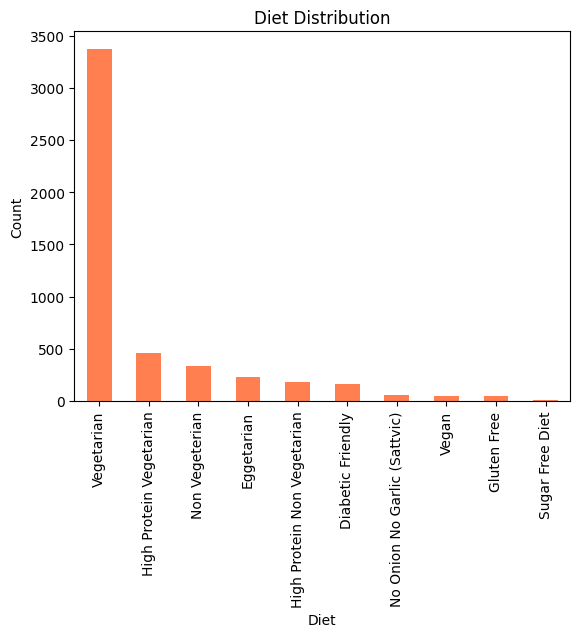

In [43]:
df['Diet'].value_counts().plot(kind='bar', title='Diet Distribution', color='coral')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###Observations:
- By plotting a bar chart for the distribution of the different diet types in our dataset, we noticed that the most common diet type in our dataset is the Vegetarian one.
- The other diet types are less common in our dataset.

In [44]:
df['Diet'].nunique()

10

###Observations:
- We have 10 unique diet types in our dataset.

In [45]:
df['Diet'].unique()

array(['High Protein Non Vegetarian', 'Vegetarian', 'Eggetarian',
       'Non Vegeterian', 'High Protein Vegetarian', 'Diabetic Friendly',
       'Gluten Free', 'Vegan', 'Sugar Free Diet',
       'No Onion No Garlic (Sattvic)'], dtype=object)

###Observations:
- By carefully examining all of the diet types, we found that all of these values are actually diet types and it's not necessary to drop any of these.

In [46]:
df['Diet'].value_counts()

,count
Diet,
Vegetarian,3371
High Protein Vegetarian,460
Non Vegeterian,337
Eggetarian,231
High Protein Non Vegetarian,185
Diabetic Friendly,166
No Onion No Garlic (Sattvic),54
Vegan,48
Gluten Free,43


###Observations:
- We also concluded that the Vegetarian diet is by far the most common in our dataset, since we have 3370 recipes that are actually Vegetarian.
- People that follow a Vegeterian diet lifestyle have the privilege to find more recipes that match their needs.

In [47]:
indian_cuisine = df[df['Cuisine'] == 'Indian']
indian_cuisine.count()

,0
ID,947
Title,947
Cleaned_Ingredients,947
Instructions,947
Prep_Time,947
Cook_Time,947
Cuisine,947
Course,947
Diet,947
Image,0


In [48]:
continental_cuisine = df[df['Cuisine'] == 'Continental']
continental_cuisine.count()

,0
ID,790
Title,790
Cleaned_Ingredients,790
Instructions,790
Prep_Time,790
Cook_Time,790
Cuisine,790
Course,790
Diet,790
Image,0


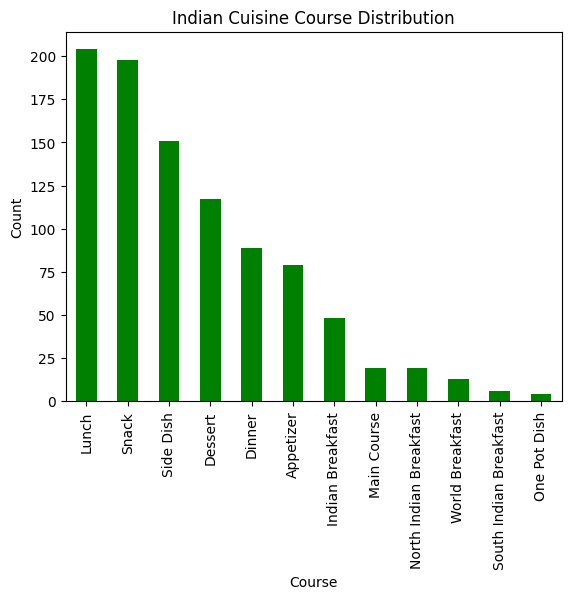

In [49]:
indian_cuisine['Course'].value_counts().plot(kind='bar', title='Indian Cuisine Course Distribution', color='green')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###Observations:
- This is the distribution of the course types across all Indian recipes.
- Both the Lunch and Snack types are the most common across the Indian recipes.

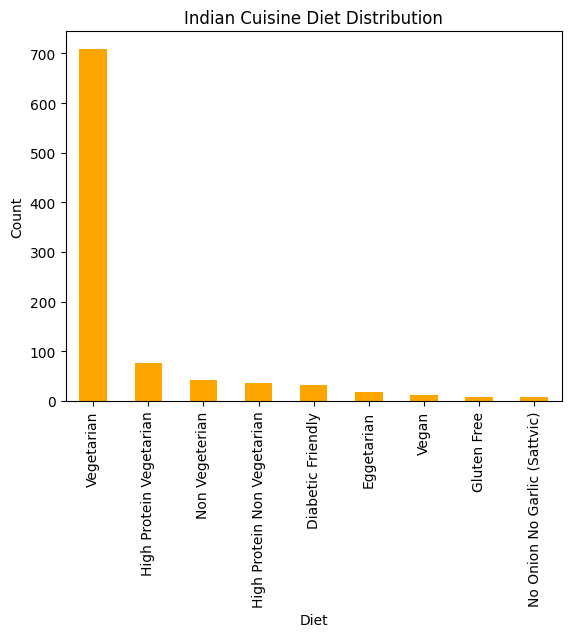

In [50]:
indian_cuisine['Diet'].value_counts().plot(kind='bar', title='Indian Cuisine Diet Distribution', color='orange')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###Observations:
- The most common type of diet through all the Indian recipes is the Vegetarian one.

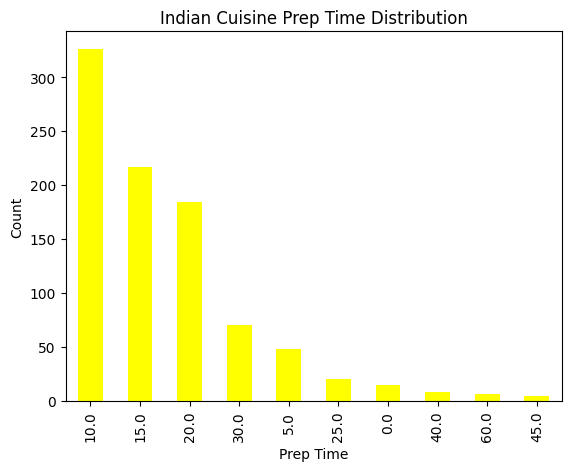

In [51]:
indian_cuisine['Prep_Time'].value_counts().head(10).plot(kind='bar', title='Indian Cuisine Prep Time Distribution', color='yellow')
plt.xlabel('Prep Time')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###Observations:
- Most of the Indian recipes take around 10 minutes to be prepared, which indicates that Indian recipes are mostly easy to prepare.

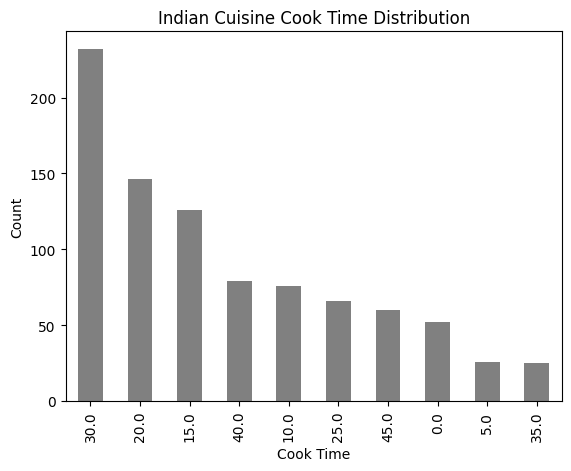

In [52]:
indian_cuisine['Cook_Time'].value_counts().head(10).plot(kind='bar', title='Indian Cuisine Cook Time Distribution', color='grey')
plt.xlabel('Cook Time')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###Observations:
- Most of the Indian recipes take around 30 minutes to be cooked, which is a reasonable time for recipes that are not so complicated.

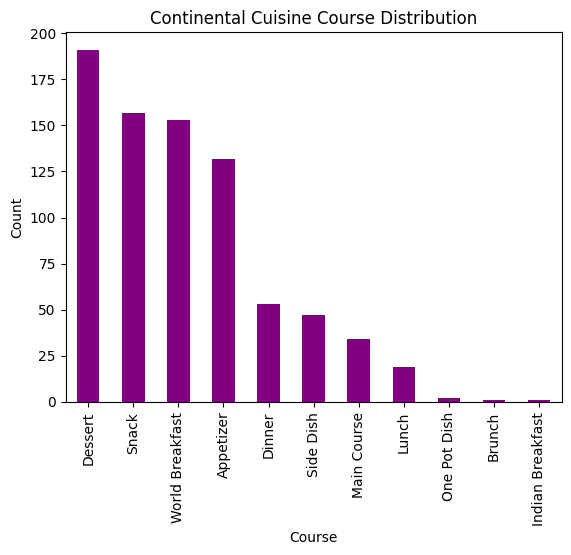

In [53]:
continental_cuisine['Course'].value_counts().plot(kind='bar', title='Continental Cuisine Course Distribution', color='purple')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###Observations:
- This is the distribution of the course types across all Continental recipes.
- The Dessert type is the most common across the Continental recipes, which highlights the importance of sweets in Continental cuisine..

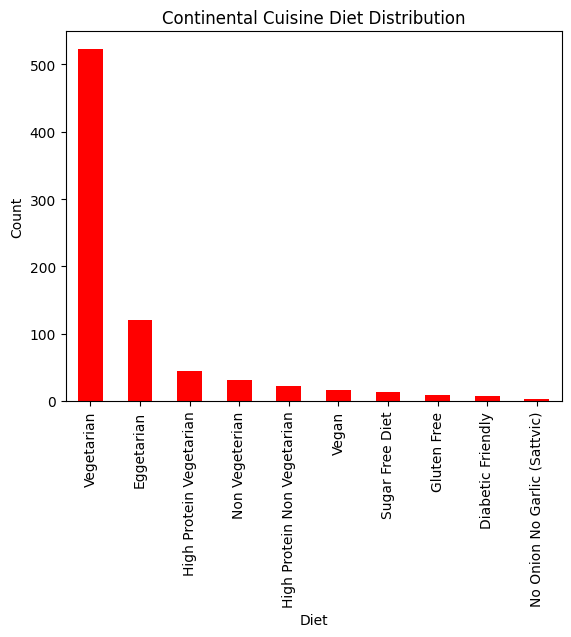

In [54]:
continental_cuisine['Diet'].value_counts().plot(kind='bar', title='Continental Cuisine Diet Distribution', color='red')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###Observations:
- Similarly to the Indian cuisine, the most common type of diet through all the Continental recipes is the Vegetarian one, indicating a strong emphasis on plant-based dishes.

In [55]:
vegetarian_diet = df[df['Diet'] == 'Vegetarian']
vegetarian_diet.count()

,0
ID,3371
Title,3371
Cleaned_Ingredients,3371
Instructions,3371
Prep_Time,3371
Cook_Time,3371
Cuisine,3371
Course,3371
Diet,3371
Image,0


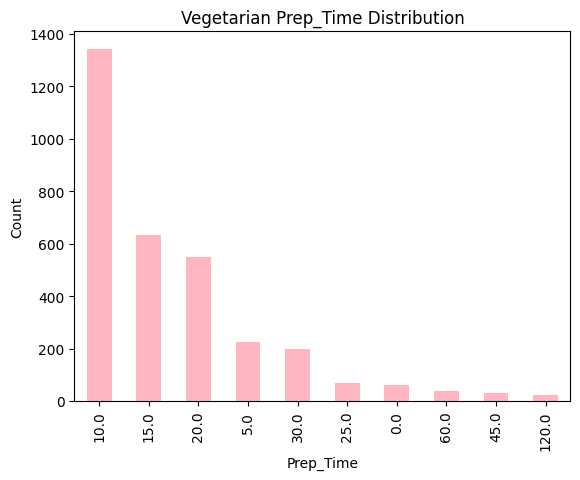

In [56]:
vegetarian_diet['Prep_Time'].value_counts().head(10).plot(kind='bar', title='Vegetarian Prep_Time Distribution', color='lightpink')
plt.xlabel('Prep_Time')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###Observations:
- Most of the vegetarian food need around 10 minutes to be prepared.
- This makes them an ideal choice for those seeking fast and convenient meals.

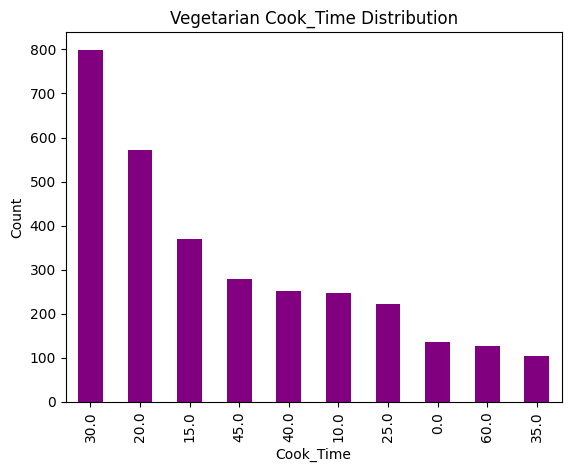

In [57]:
vegetarian_diet['Cook_Time'].value_counts().head(10).plot(kind='bar', title='Vegetarian Cook_Time Distribution', color='purple')
plt.xlabel('Cook_Time')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

###Observations:
- Most of the vegetarian food need around 30 minutes to be cooked.

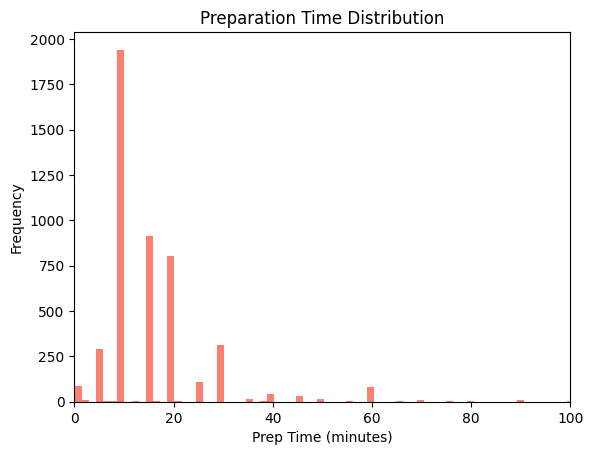

In [58]:
df['Prep_Time'].plot(kind='hist', bins=2000, title='Preparation Time Distribution', color='salmon')
plt.xlabel('Prep Time (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Limit x-axis from 0 to 600 minutes
plt.show()

###Observations:
- The majority of recipes require a relatively short preparation time, with most clustering around 0-20 minutes.
- This distribution indicates that simple and quick recipes are dominant in our dataset.

In [59]:
df['Prep_Time'].value_counts().head(5)

,count
Prep_Time,
10.0,1941
15.0,912
20.0,803
30.0,312
5.0,288


###Observations:
- As mentioned before, most of our recipes (1939 recipes) need only 10 minutes to be prepared.

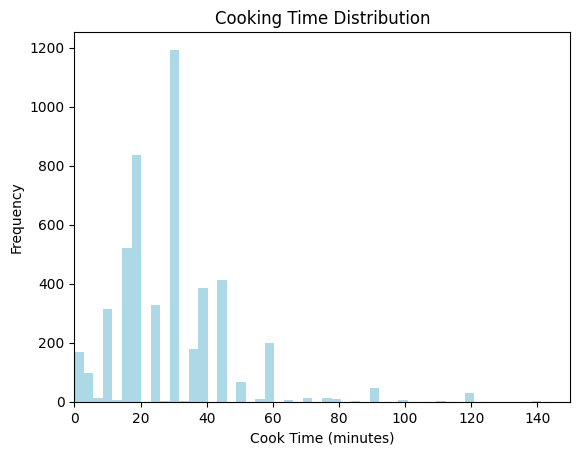

In [60]:
df['Cook_Time'].plot(kind='hist', bins=500, title='Cooking Time Distribution', color='lightblue')
plt.xlabel('Cook Time (minutes)')
plt.ylabel('Frequency')
plt.xlim(0,150)
plt.show()


###Observations:
- The majority of recipes require a relatively short cooking time, with most clustering around 20-40 minutes.
- Most of the recipes present in our dataset need around 30 minutes to be cooked.
- The distribution indicates that simple and quick recipes are dominant in our dataset, since the number of recipes decreases when the cooking time increases.

In [61]:
df['Cook_Time'].value_counts().head(5)

,count
Cook_Time,
30.0,1193
20.0,833
15.0,520
45.0,412
40.0,382


###Observations:
- As mentioned before, most of our recipes (1181 recipes) need only 30 minutes to be cooked.

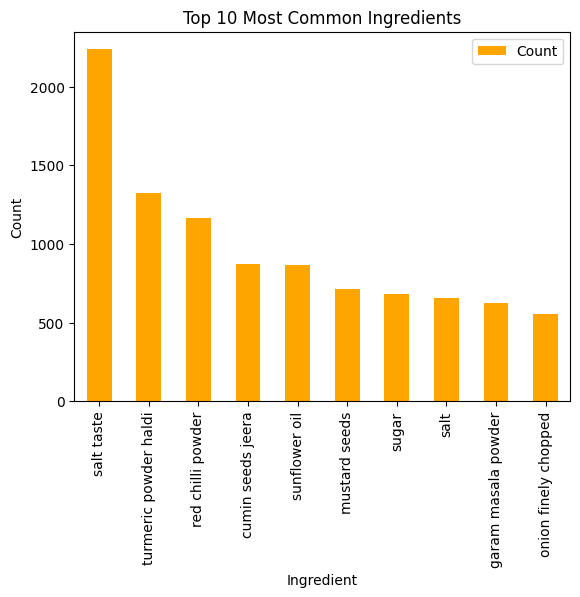

In [62]:
from collections import Counter
df["Cleaned_Ingredients"] = df["Cleaned_Ingredients"].apply(ast.literal_eval)

ingredients = df['Cleaned_Ingredients'].tolist()
flat_ingredients = [item for sublist in ingredients for item in sublist]
ingredient_counts = Counter(flat_ingredients)
common_ingredients = ingredient_counts.most_common(10)

pd.DataFrame(common_ingredients, columns=['Ingredient', 'Count']).set_index('Ingredient').plot(kind='bar', title='Top 10 Most Common Ingredients', color='orange')
plt.ylabel('Count')
plt.show()


###Observations:
- These are the top 10 most common ingredients across all the recipes in our dataset.

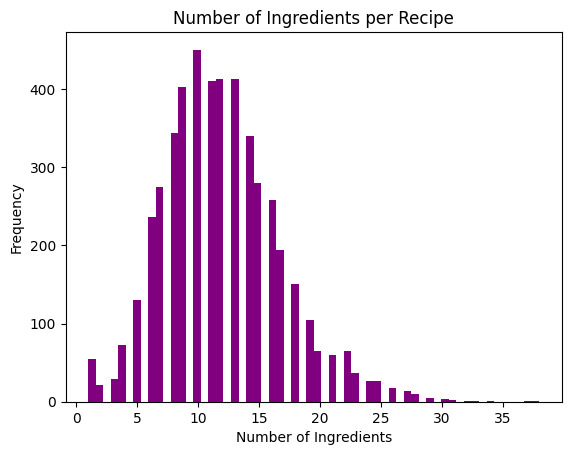

In [63]:
df['Num_Ingredients'] = df['Cleaned_Ingredients'].apply(lambda x: len(x))
df['Num_Ingredients'].plot(kind='hist', bins=60, title='Number of Ingredients per Recipe', color='purple')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()


###Observations:
- The majority of recipes use between 5 to 15 ingredients, with a noticeable peak around 10 ingredients per recipe.
- This suggests that the recipes in the dataset tend to be moderately complex, requiring a fair number of ingredients but still manageable for most home cooks.

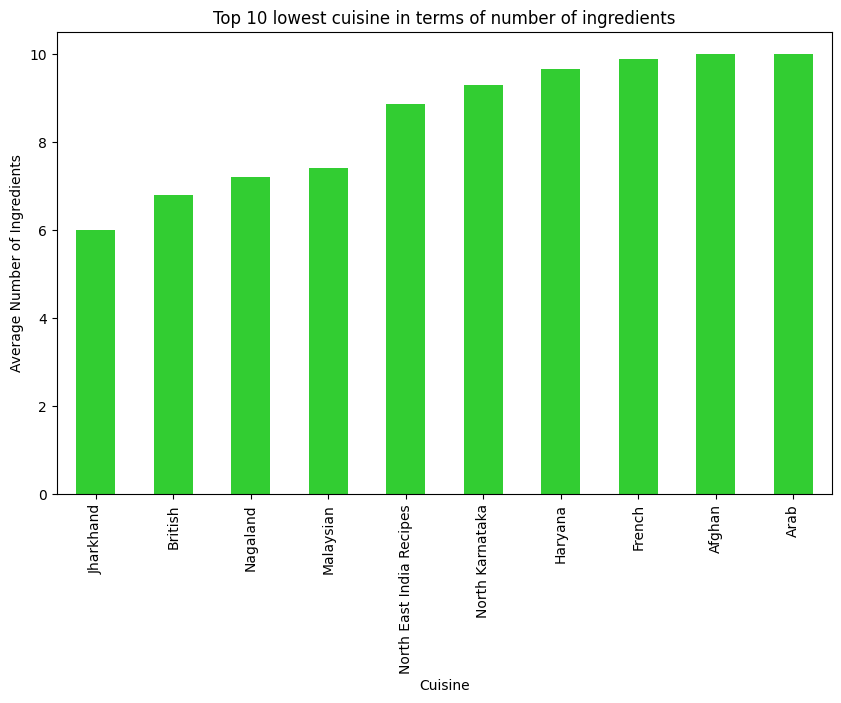

In [64]:
plt.figure(figsize=(10,6))
df.groupby('Cuisine')['Num_Ingredients'].mean().sort_values()[:10].plot(kind='bar', title='Top 10 lowest cuisine in terms of number of ingredients', color='limegreen')
plt.xlabel('Cuisine')
plt.ylabel('Average Number of Ingredients')
plt.xticks(rotation=90)
plt.show()


###Observations:
- Jharkhand cuisine has the fewest ingredients on average indicating simpler recipes with fewer components.
- Cuisines like Korean and North Karnataka rank higher within this group but still maintain a relatively low ingredient count, suggesting that these cuisines emphasize simplicity in their recipes.

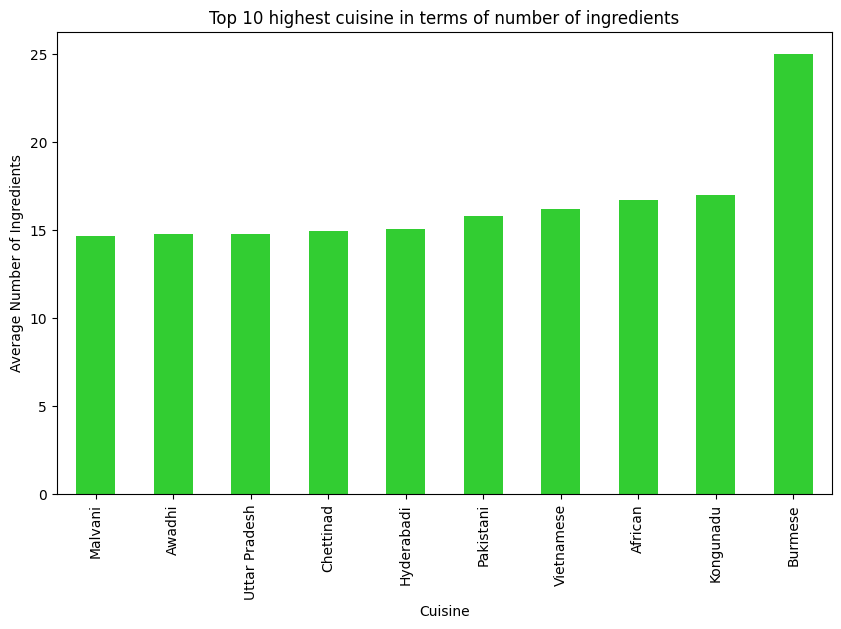

In [65]:
plt.figure(figsize=(10,6))
df.groupby('Cuisine')['Num_Ingredients'].mean().sort_values()[-10:].plot(kind='bar', title='Top 10 highest cuisine in terms of number of ingredients', color='limegreen')
plt.xlabel('Cuisine')
plt.ylabel('Average Number of Ingredients')
plt.xticks(rotation=90)
plt.show()


###Observation:
- The cuisine that has on average the highest number of ingredients is the Burmese cuisine, indicating the complexity of completing the recipes of this specific cuisine.

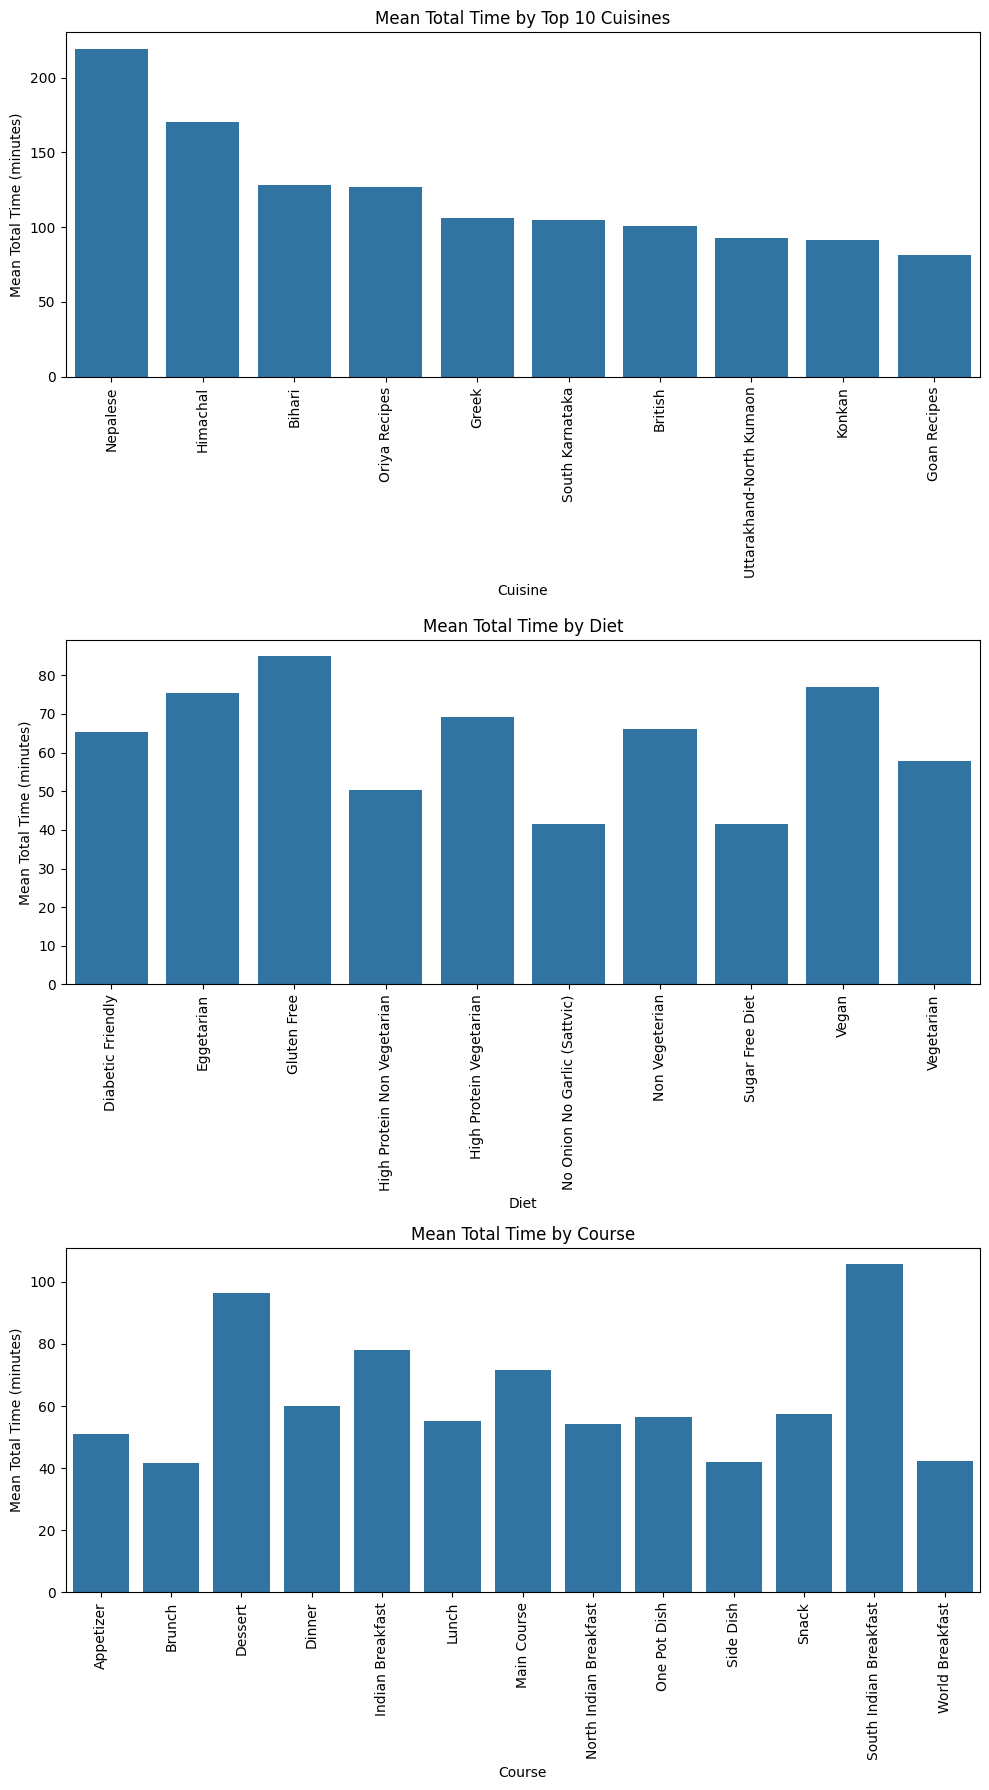

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Total Time
df['Total_Time'] = df['Prep_Time'] + df['Cook_Time']

# Aggregating the data by mean for each category
agg_df = df.groupby('Cuisine')['Total_Time'].mean().reset_index()

# Set up the subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot 1: Mean Total Time by Top 10 Cuisines
top_cuisines = agg_df.nlargest(10, 'Total_Time')
sns.barplot(x='Cuisine', y='Total_Time', data=top_cuisines, ax=axs[0])
axs[0].set_title('Mean Total Time by Top 10 Cuisines')
axs[0].set_xlabel('Cuisine')
axs[0].set_ylabel('Mean Total Time (minutes)')
axs[0].tick_params(axis='x', rotation=90)

# Plot 2: Mean Total Time by Diet
agg_df_diet = df.groupby('Diet')['Total_Time'].mean().reset_index()
sns.barplot(x='Diet', y='Total_Time', data=agg_df_diet, ax=axs[1])
axs[1].set_title('Mean Total Time by Diet')
axs[1].set_xlabel('Diet')
axs[1].set_ylabel('Mean Total Time (minutes)')
axs[1].tick_params(axis='x', rotation=90)

# Plot 3: Mean Total Time by Course
agg_df_course = df.groupby('Course')['Total_Time'].mean().reset_index()
sns.barplot(x='Course', y='Total_Time', data=agg_df_course, ax=axs[2])
axs[2].set_title('Mean Total Time by Course')
axs[2].set_xlabel('Course')
axs[2].set_ylabel('Mean Total Time (minutes)')
axs[2].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


###Observations:
-	*Cuisine:* Nepalese cuisine emerged as the most time-consuming, suggesting complex preparation/cooking methods.
-	*Course:* High-protein vegetarian dishes were notably more time-intensive, reflecting their complexity.
-	*Diet:* Gluten-free diet requires slightly longer times to be prepared and cooked, potentially due to specialized ingredients and/or techniques.


# Visualizing embeddings in 3D after PCA

In [67]:
df=pd.read_csv("./drive/MyDrive/dataCleaned.csv")

In [68]:
# Read the JSON file
with open('./drive/MyDrive/embeddings.json', 'r') as f:
  data = json.load(f)

# Save the embeddings in an array
embeddings = [embedding for embedding in data.values()]
embeddings_array = np.array(embeddings)

# iterate over data.keys(), you get the id, then given this id go bring the title from df
titles=[]
for id in data.keys():
  try:
    title = df[df['ID'] == int(id)]['Title'].values[0]
    titles.append(title)
  except:
    continue

In [69]:
import numpy as np
from sklearn.decomposition import PCA
import plotly.graph_objects as go

# Initialize PCA and reduce dimensions to 3
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(embeddings_array)

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=X_reduced[:, 0],
    y=X_reduced[:, 1],
    z=X_reduced[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=X_reduced[:, 2],  # color by z-axis value
        colorscale='Viridis',
        opacity=0.8
    ),
    text=titles,  # This will be shown on hover
    hoverinfo='text'
)])

# Update layout
fig.update_layout(
    title='PCA Reduced Data in 3D Space',
    scene=dict(
        xaxis_title='PC 1',
        yaxis_title='PC 2',
        zaxis_title='PC 3'
    ),
    width=800,
    height=700,
)

# Show the plot
fig.show()

# Translation functions

In [70]:
from deep_translator import GoogleTranslator
from langdetect import detect
def is_hindi(text):
  return detect(text) == "hi"

def translate_text(text, target_lang, source_lang="auto"):
    translator = GoogleTranslator(source=source_lang, target=target_lang)
    return translator.translate(text)

# Algorithm

load the data and save variable needed from gradio

In [71]:
import gradio as gr
import pandas as pd
import base64
from io import BytesIO



#load the data
df = pd.read_csv("./drive/MyDrive/dataCleaned.csv")

# Save unique ingredients,cuisines, courses and diets for the value of the gradio app
df["Cleaned_Ingredients"] = df["Cleaned_Ingredients"].apply(ast.literal_eval)
distinct_ingredients=set()
for row in df["Cleaned_Ingredients"]:
  for ingredient in row:
    distinct_ingredients.add(ingredient)
distinct_ingredients=sorted(list(distinct_ingredients))
ingredients = distinct_ingredients

cuisines = df['Cuisine'].dropna().unique().tolist()
cuisines = [cuisine for cuisine in cuisines if cuisine.lower() != 'unknown']

courses = df['Course'].dropna().unique().tolist()
courses = [course for course in courses if course.lower() != 'unknown']

diets = df['Diet'].dropna().unique().tolist()
diets = [diet for diet in diets if diet.lower() != 'unknown']

functions related to embedding loading and saving

In [72]:
# Load user embeddings as json file
def load_user_embeddings():
  if os.path.exists("./drive/MyDrive/user_embeddings.json"):
    with open("./drive/MyDrive/user_embeddings.json", "r") as f:
      user_embeddings = json.load(f)
  else:
    user_embeddings = {}
  return user_embeddings

# Save user embeddings
def save_user_embeddings(user_embeddings):

  with open("./drive/MyDrive/user_embeddings.json", "w") as f:
    json.dump(user_embeddings, f)
    print("saved")

# Extract the embedding of a certain user
def get_user_embeddings(user_id, user_embeddings):
  if user_id in user_embeddings.keys():
    return user_embeddings[int(user_id)]
  else:
    return None

# Update the embedding of a certain user with the new search he made
def update_user_embeddings(user_id, user_embeddings, new_embedding, alpha):
    if user_id in user_embeddings.keys():
        previous_embedding = torch.tensor(user_embeddings[user_id])
        new_embedding = torch.tensor(new_embedding)
        updated_embedding = (1-alpha) * new_embedding + alpha * previous_embedding
        user_embeddings[user_id] = [float(x) for x in updated_embedding]
    else:
        user_embeddings[user_id] = [float(x) for x in new_embedding]

    if user_embeddings:
      save_user_embeddings(user_embeddings)


filtering and computing most similar data based on embeddings functions

In [73]:
# This function filters the dataframe based of columns
def filter_df(df, **kwargs):
    filtered_df = df.copy()

    for key, value in kwargs.items():
        # do not include title in filtering
        if key=="Title":
          continue
        # if the value to filter with is empty continue
        if value==[] or value=="" or value==None:
          continue
        # if the column is not in the dataframe continue
        if key not in df.columns:
            raise ValueError(f"Column '{key}' is not in the DataFrame.")

        # Numeric filter: take rows where the column value is less than the given number
        if pd.api.types.is_numeric_dtype(df[key]):
            if not isinstance(value, (int, float)):
                raise ValueError(f"The value for numeric column '{key}' must be a number.")
            filtered_df = filtered_df[filtered_df[key] <= value]

        # Categorical filter: take rows where the column value is in the list of inputs
        elif pd.api.types.is_string_dtype(df[key]):
            if not isinstance(value, list) or not all(isinstance(v, str) for v in value):
                raise ValueError(f"The value for categorical column '{key}' must be a list of strings.")
            filtered_df = filtered_df[filtered_df[key].isin(value)]

        # Filter for Cleaned_Ingredients: return rows with any matching ingredient
        elif key == 'Cleaned_Ingredients':
            if not isinstance(value, list) or not all(isinstance(v, str) for v in value):
                raise ValueError(f"The value for 'Cleaned_Ingredients' must be a list of strings.")
            filtered_df = filtered_df[filtered_df[key].apply(lambda ingredients: any(ingredient in ingredients for ingredient in value))]

        # Raise an error if the column type is not supported
        else:
            raise TypeError(f"Column type of '{key}' is not supported.")

    return filtered_df



def compute_average_embedding(title_text=None, image=None):
    embeddings = []
    if title_text:
        title_embedding = torch.tensor(model.encode_text(title_text)).to(device)
        embeddings.append(title_embedding)
    if image:
        # Check if `image` is a file path or a file-like object
        if isinstance(image, str) or hasattr(image, 'read'):
            # Open the image file
            image = Image.open(image)
        # image = Image.open(image)
        image_embedding = torch.tensor(model.encode_image(image)).to(device)
        embeddings.append(image_embedding)
    if len(embeddings) == 0:
        return list(torch.zeros(768).cpu().numpy())
    avg_embedding = torch.mean(torch.stack(embeddings), dim=0)
    return list(avg_embedding.cpu().numpy())




from sklearn.metrics.pairwise import cosine_similarity
# Function to find the most similar recipes
def find_most_similar_recipe(avg_embedding, embeddings_json_path,data,top_n=5):
    # Load embeddings from JSON file
    with open(embeddings_json_path, 'r') as f:
        recipe_embeddings = json.load(f)

    # Filter the embeddings based on IDs in the DataFrame, making sure no ids are selected outside the data (which refers to the filtered df)
    df_ids = set(data['ID'].astype(str))  # Ensure IDs are strings
    filtered_embeddings = {k: v for k, v in recipe_embeddings.items() if k in df_ids}

    # Convert the filtered dictionary to list of IDs and embeddings
    recipe_ids = list(filtered_embeddings.keys())
    embeddings = [torch.tensor(embed) for embed in filtered_embeddings.values()]

    # Calculate cosine similarity between the average embedding and all recipe embeddings
    similarities = cosine_similarity([avg_embedding], embeddings)[0]

    # Get top_n most similar recipes
    top_indices = similarities.argsort()[-top_n:][::-1]
    top_ids = [int(recipe_ids[i]) for i in top_indices]

    return top_ids

prediction function that have the logic of our algorithm

In [74]:
# Function that add everything and return the recommendation
def prediction(data=None,title_text="",image=None,Notfiltered=True,user_embedding=None,**kwargs):
  # try:
    if data is None:
          raise ValueError("Make sure you send the data")
    # If the data is not filtered , filter it
    if Notfiltered:
        data = filter_df(data, **kwargs)
    if image is not None:
        # read the image
        try:
          image_data = base64.b64decode(image)
          image = Image.open(BytesIO(image_data))
        except Exception as e:
          try:
            image=Image.fromarray(np.array(image))
          except Exception as e:
            pass
    # Compute average embedding from title and/or image
    input_is_hindi = is_hindi(title_text) if title_text else False
    if input_is_hindi:
      title_text = translate_text(title_text, "en", "hi")
    avg_embedding = compute_average_embedding(title_text, image)

    # If the user embedding already exists, add it to the embedding of the search query
    # Gives more weight to the current query and less to the user embedding
    if user_embedding:
      avg_embedding = 0.8*avg_embedding+0.2* user_embedding

    # If there was error in calculating the embeddingm return the first 5 rows of the filtered dataframe
    if avg_embedding is None:
      return data.head(5), None

    # Find most similar recipes
    top_ids = find_most_similar_recipe(avg_embedding, './drive/MyDrive/embeddings.json',data, top_n=5)

    # Get the rows that are the most similar to the query and user embedding
    final_data = data[data['ID'].apply(lambda x: x in top_ids)]

        # If the input was in Hindi, translate the results back to Hindi
    if input_is_hindi:
      final_data['Title'] = final_data['Title'].apply(lambda x: translate_text(x, 'hi', 'en'))

    return final_data
  # except Exception as e:
  #   print(e)


feedback related functions

In [75]:
import csv
def update_embedding_from_feedback(user_id,title_text,image, rating):
    user_embeddings = load_user_embeddings()
    if image is not None:
      # read the image
      try:
        image_data = base64.b64decode(image)
        image = Image.open(BytesIO(image_data))
      except Exception as e:
        try:
          image=Image.fromarray(np.array(image))
        except Exception as e:
          pass
    # Compute average embedding from title and/or image
    input_is_hindi = is_hindi(title_text) if title_text else False
    if input_is_hindi:
      title_text = translate_text(title_text, "en", "hi")
    avg_embedding = compute_average_embedding(title_text, image)
    update_user_embeddings(user_id, user_embeddings, new_embedding=list(avg_embedding),alpha=rating/5)

def save_feedback(user_id, recipe_titles, rating, title_text,image):
    # Save feedback as before
    feedback_file = "./drive/MyDrive/recipe_feedback.csv"  # Path to save feedback
    feedback_data = {
        'user_id': user_id,
        'recipe_titles': recipe_titles,
        'rating': rating,
        "title_text": title_text,
    }

    with open(feedback_file, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=feedback_data.keys())
        if file.tell() == 0:  # Add header if the file is new
            writer.writeheader()
        writer.writerow(feedback_data)
    # Update embeddings based on rating
    update_embedding_from_feedback(user_id,title_text,image, rating/5)


In [76]:
# convert the image to base64
def image_to_base64(image):
    """Encodes a Pillow Image object into a base64 string.

    Args:
      image: A Pillow Image object.

    Returns:
      A base64-encoded string representing the image.
    """
    try:
        # If the input is not already a Pillow Image, convert it
        if not isinstance(image, Image.Image):
            image = Image.fromarray(image)

        # Convert the image to JPEG format for better compatibility
        image = image.convert("RGB")

        # Save the image to a BytesIO object in JPEG format
        img_bytes = BytesIO()
        image.save(img_bytes, format="JPEG")

        # Encode the image data as base64
        base64_str = base64.b64encode(img_bytes.getvalue()).decode("utf-8")

        return base64_str

    except Exception as e:
        print(f"Error converting image to base64: {e}")
        return None

function that handles adding new recipes and new reviews to the data

In [77]:
file_path="./drive/MyDrive/recipes_add.csv"
def recipes_add(recipe_name, prep_time, cook_time, selected_cuisines, selected_courses, selected_diets, selected_ingredients, image_input = None):
    # Convert image to base64 if provided
    image_base64 = None
    if image_input is not None:
        image_base64 = image_to_base64(image_input)
    try:
      selected_cuisines =', '.join(selected_cuisines)
    except:
      pass
    try:
      selected_courses =', '.join(selected_courses)
    except:
      pass
    try:
      selected_diets =', '.join(selected_diets)
    except:
      pass
    try:
      selected_ingredients =', '.join(selected_ingredients)
    except:
      pass
    # Define the recipe as a dictionary
    recipe = {
        'Title': recipe_name,
        'Prep_Time': prep_time,
        'Cook_Time': cook_time,
        'Cuisine':  selected_cuisines , # Join lists with commas
        'Course': selected_courses,
        'Diet': selected_diets,
        'Cleaned_Ingredients': selected_ingredients,
        'Image': image_base64  # Assuming image_input is the path to the image
    }

    # Open the CSV file and append the new recipe
    with open(file_path, 'a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=recipe.keys())

        # Check if the file is empty to write the header
        file_empty = file.tell() == 0
        if file_empty:
            writer.writeheader()

        writer.writerow(recipe)

def save_review(review_text):
    # Define the path to save reviews
    review_file = "./drive/MyDrive/user_reviews.csv"  # Path to save reviews

    # Prepare the review data
    review_data = {
        'review_text': review_text
    }

    # Append the review to the CSV file
    with open(review_file, mode='a', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=review_data.keys())
        if file.tell() == 0:  # Add header if the file is new
            writer.writeheader()
        writer.writerow(review_data)

functions that are directly called by gradio, these functions uses the functions defined earlier and process the output to a gradio format and ensures the right variables are returned

In [78]:
def recommend_recipes(user_id, title_text, prep_time, cook_time, selected_cuisines, selected_courses, selected_diets, selected_ingredients, image=None):
    # try:
        # Load user embeddings
        user_embeddings = load_user_embeddings()
        user_embedding = get_user_embeddings(user_id, user_embeddings)

        # Ensure inputs are lists or empty lists if they are None
        selected_cuisines = selected_cuisines if selected_cuisines else []
        selected_courses = selected_courses if selected_courses else []
        selected_diets = selected_diets if selected_diets else []
        selected_ingredients = selected_ingredients if selected_ingredients else []

        # Apply filtering based on inputs
        filtered_df = filter_df(
            df,
            Prep_Time=prep_time,
            Cook_Time=cook_time,
            Cuisine=selected_cuisines,
            Course=selected_courses,
            Diet=selected_diets,
            Cleaned_Ingredients=selected_ingredients
        )

        if filtered_df.empty:
            return "No matching recipes found. Please adjust your inputs.", filtered_df[['Title', 'Cuisine', 'Course', 'Diet', 'Prep_Time', 'Cook_Time', 'Cleaned_Ingredients', 'Instructions']].to_markdown(index=False)


        # Get the top 5 recipes based on similarity
        final_df = prediction(
            data=filtered_df,
            title_text=title_text,
            image=image,
            user_embedding=user_embedding,
            Notfiltered=False
        )

        # Update user embeddings with the new embedding
        # update_user_embeddings(user_id, user_embeddings, new_embedding=list(avg_embedding),alpha=5)

        # Format the output
        recipe_titles = "\n".join(final_df['Title'].tolist())
        details = final_df[['Title', 'Cuisine', 'Course', 'Diet', 'Prep_Time', 'Cook_Time', 'Cleaned_Ingredients', 'Instructions']].to_markdown(index=False)

        return recipe_titles, details

    # except Exception as e:
    #     print(f"Error in recommend_recipes: {e}")
    #     return f"An error occurred: {e}", ""



def handle_recommend_recipes(user_id, title_text, prep_time, cook_time, selected_cuisines, selected_courses, selected_diets, selected_ingredients, image_input):
    try:
        recipe_titles, details = recommend_recipes(user_id, title_text, prep_time, cook_time, selected_cuisines, selected_courses, selected_diets, selected_ingredients, image_input)
        return recipe_titles, details, gr.update(visible=True), gr.update(visible=True), gr.update(visible=False)
    except Exception as e:
        return f"Error occurred: {str(e)}", "", None, gr.update(visible=False), gr.update(visible=False)

def handle_feedback(user_id, recipe_titles, feedback, title_text, image_input):
    try:
        save_feedback(user_id, recipe_titles, feedback, title_text, image_input)
        return gr.update(value="Thank you for your feedback!", visible=True)
    except Exception as e:
        return gr.update(value=f"Error saving feedback: {str(e)}", visible=True)

def handle_review_submission(review_text):
    try:
        save_review(review_text)
        # Handle saving review to a file or database here
        return (
            gr.update(value="Thank you for your review!", visible=True),  # Update review message
            gr.update(value="")  # Clear the review textbox
        )
    except Exception as e:
        return (
            gr.update(value=f"Error saving review: {str(e)}", visible=True),
            gr.update(value="")  # Clear the review textbox
        )
def handle_recipe_submission(recipe_name, prep_time, cook_time, selected_cuisines, selected_courses, selected_diets, selected_ingredients, image_input):
    # Check if all required fields are filled out
    if not recipe_name or not selected_cuisines or not selected_courses or not selected_diets or not selected_ingredients:
        return gr.update(value="Error: Please fill out all required fields.", visible=True)

    # Save the submitted recipe
    recipes_add(recipe_name, prep_time, cook_time, selected_cuisines, selected_courses, selected_diets, selected_ingredients, image_input)
    return gr.update(value="Thank you for submitting a recipe of your choice! We'll get back to you whether it was approved or denied!", visible=True)

# **GRADIO**

In [ ]:
import gradio as gr

# Custom CSS for styling and dynamic effects
custom_css = """
body {background-color: #f3f4f6; font-family: 'Helvetica', sans-serif; color: #1a1a1a; margin: 0; padding: 0;}
#header {background: linear-gradient(to right, #003366, #336699, #6699cc, #99ccff); color: white; padding: 30px; text-align: center; border-radius: 10px; margin-bottom: 20px;}
#header h1 {margin: 0; font-size: 2.5em; font-weight: bold; letter-spacing: 1.5px;}
#nav {display: flex; justify-content: center; padding: 10px 0; margin-bottom: 20px;}
#nav a {color: #1a1a1a; text-decoration: none; font-weight: bold; margin: 0 15px; font-size: 1.1em; cursor: pointer; background-color: transparent; border: none; outline: none; padding: 0;}
#nav a:hover {color: #336699; text-decoration: underline;}
#feedback_message {background-color: #336699; color: #5580A3; padding: 15px; border-radius: 5px; margin-top: 20px; text-align: center; font-weight: bold;}
#review_message {background-color: #336699; color: #5580A3; padding: 15px; border-radius: 5px; margin-top: 20px; text-align: center; font-weight: bold;}
#submit_message {background-color: #336699; color: #5580A3; padding: 15px; border-radius: 5px; margin-top: 20px; text-align: center; font-weight: bold;}
"""

# Functions to switch pages
def show_overview():
    return (
        gr.update(visible=True),
        gr.update(visible=False),
        gr.update(visible=False),
        gr.update(visible=False),
        gr.update(visible=False),
        gr.update(value=""),  # Clear review textbox
        gr.update(value="", visible=False),  # Hide review message
        gr.update(value=""),  # Clear recipe name
        gr.update(value=30),  # Reset prep time slider
        gr.update(value=30),  # Reset cook time slider
        gr.update(value=[]),  # Clear selected cuisines
        gr.update(value=[]),  # Clear selected courses
        gr.update(value=[]),  # Clear selected diets
        gr.update(value=[]),  # Clear selected ingredients
        gr.update(value=None),  # Clear image input
        gr.update(value="", visible=False)  # Hide submit message
    )

def show_terms():
    return (
        gr.update(visible=False),
        gr.update(visible=True),
        gr.update(visible=False),
        gr.update(visible=False),
        gr.update(visible=False),
        gr.update(value=""),  # Clear review textbox
        gr.update(value="", visible=False),  # Hide review message
        gr.update(value=""),  # Clear recipe name
        gr.update(value=30),  # Reset prep time slider
        gr.update(value=30),  # Reset cook time slider
        gr.update(value=[]),  # Clear selected cuisines
        gr.update(value=[]),  # Clear selected courses
        gr.update(value=[]),  # Clear selected diets
        gr.update(value=[]),  # Clear selected ingredients
        gr.update(value=None),  # Clear image input
        gr.update(value="", visible=False)  # Hide submit message
    )

def show_recipes():
    return (
        gr.update(visible=False),
        gr.update(visible=False),
        gr.update(visible=True),
        gr.update(visible=False),
        gr.update(visible=False),
        gr.update(value=""),  # Clear review textbox
        gr.update(value="", visible=False),  # Hide review message
        gr.update(value=""),  # Clear recipe name
        gr.update(value=30),  # Reset prep time slider
        gr.update(value=30),  # Reset cook time slider
        gr.update(value=[]),  # Clear selected cuisines
        gr.update(value=[]),  # Clear selected courses
        gr.update(value=[]),  # Clear selected diets
        gr.update(value=[]),  # Clear selected ingredients
        gr.update(value=None),  # Clear image input
        gr.update(value="", visible=False)  # Hide submit message
    )

def show_review_page():
    return (
        gr.update(visible=False),
        gr.update(visible=False),
        gr.update(visible=False),
        gr.update(visible=True),
        gr.update(visible=False),
        gr.update(value=""),  # Clear recipe name
        gr.update(value=30),  # Reset prep time slider
        gr.update(value=30),  # Reset cook time slider
        gr.update(value=[]),  # Clear selected cuisines
        gr.update(value=[]),  # Clear selected courses
        gr.update(value=[]),  # Clear selected diets
        gr.update(value=[]),  # Clear selected ingredients
        gr.update(value=None),  # Clear image input
        gr.update(value="", visible=False)  # Hide submit message
    )

def show_submit_recipe_page():
    return (
        gr.update(visible=False),
        gr.update(visible=False),
        gr.update(visible=False),
        gr.update(visible=False),
        gr.update(visible=True),
        gr.update(value=""),  # Clear review textbox
        gr.update(value="", visible=False)  # Hide review message
    )



# Define the Gradio Blocks interface with navigation
with gr.Blocks(css=custom_css) as demo:
    gr.Markdown("<div id='header'><h1>🍲 MAGIC CHEF </h1></div>")

    with gr.Row(elem_id="nav"):
        overview_btn = gr.Button("Overview", elem_classes="nav-link")
        terms_btn = gr.Button("Terms", elem_classes="nav-link")
        recipes_btn = gr.Button("Recipes", elem_classes="nav-link")
        review_btn = gr.Button("Leave a Review", elem_classes="nav-link")
        submit_recipe_nav_btn = gr.Button("Submit Your Recipe", elem_classes="nav-link")  # Renamed for clarity

    with gr.Column(visible=True) as overview_page:
        gr.Markdown("""
        ## The Ultimate Recipe API for Your Culinary Needs

        Our expert team has meticulously built an extensive food database designed to understand the intricate connections between ingredients, recipes, cooking methods, and dietary preferences.

        With our API, you can easily discover recipes that match your specific requirements, whether they're based on preparation time, cuisine, or dietary needs.

        ### Why Choose Magic Chef?

        - **Intelligent Filtering:** Our system intelligently filters and suggests recipes, ensuring that you find exactly what you're looking for.
        - **Customizable Results:** Whether you're searching for a quick weeknight dinner, a vegetarian delight, or something that aligns with your unique dietary restrictions, our API has got you covered.
        - **Comprehensive Data:** Access a database that's as diverse as your culinary imagination.

        Magic Chef transforms your kitchen experience by providing personalized recipe recommendations at your fingertips.
        """)
        gr.Image(value="/content/IMG.png", elem_id="overview_image")

    with gr.Column(visible=False) as terms_page:
        gr.Markdown("""
        ## User Responsibilities
        Users are expected to provide accurate and honest information when interacting with the application. They should adhere to community guidelines, respect other users, and avoid prohibited activities such as spamming or engaging in offensive behavior.

        ## Privacy Policy
        We collect and store user data to improve your experience with the application. Your information is protected and will not be shared with third parties without your consent, except where required by law.

        ## Content Submission
        When submitting content, such as reviews or recipes, users retain ownership of their submissions. However, we reserve the right to review, modify, or remove content that violates our guidelines.

        ## Limitation of Liability
        While we aim to provide accurate and helpful information, the application is provided "as is." We are not liable for any errors or issues that may arise from using the app.

        ## Updates to Terms
        These terms may be updated from time to time. Please review them regularly. The last update was on August 28, 2024.

        ## Contact Information
        If you have any questions or concerns about these terms or your use of the application, please contact us at email: talineouayjann@gmail.com OR email: charbeldaher34@gmail.com""")

    with gr.Column(visible=False) as recipe_page:
        with gr.Row():
            with gr.Column():
                user_id = gr.Number(label="User ID", value=0, precision=0, interactive=True)
                title_text = gr.Textbox(label="Recipe Name (optional)", placeholder="e.g., Chicken Curry", interactive=True)
                prep_time = gr.Slider(0, 120, step=1, label="Max Preparation Time (in minutes)", value=30, interactive=True)
                cook_time = gr.Slider(0, 120, step=1, label="Max Cooking Time (in minutes)", value=30, interactive=True)
                selected_cuisines = gr.Dropdown(cuisines, multiselect=True, label="Select Cuisine(s)")
                selected_courses = gr.Dropdown(courses, multiselect=True, label="Select Course(s)")
                selected_diets = gr.Dropdown(diets, multiselect=True, label="Select Diet(s)")
                selected_ingredients = gr.Dropdown(ingredients, multiselect=True, label="Search and Select Ingredients")
                image_input = gr.Image(label="Upload an Image (optional)")

        recipe_titles = gr.Textbox(label="Top 5 Matching Recipes")
        details = gr.Markdown(label="Recipe Details", elem_id="recipe_details")
        find_recipes_btn = gr.Button("Find Recipes")
        feedback_slider = gr.Slider(1, 5, step=1, label="Rate the Recommendations", value=3, visible=False)
        submit_feedback_btn = gr.Button("Submit Your Feedback", visible=False)
        feedback_message = gr.Markdown(value="", elem_id="feedback_message", visible=False)

        find_recipes_btn.click(
            fn=handle_recommend_recipes,
            inputs=[user_id, title_text, prep_time, cook_time, selected_cuisines, selected_courses, selected_diets, selected_ingredients, image_input],
            outputs=[recipe_titles, details, feedback_slider, submit_feedback_btn, feedback_message]
        )

        submit_feedback_btn.click(
            fn=handle_feedback,
            inputs=[user_id, recipe_titles, feedback_slider, title_text, image_input],
            outputs=feedback_message
        )

    with gr.Column(visible=False) as review_page:
        review_textbox = gr.Textbox(label="Write your review here", placeholder="Write your review...", lines=5)
        submit_review_btn = gr.Button("Submit Your Review")
        review_message = gr.Markdown(value="", elem_id="review_message", visible=False)

        submit_review_btn.click(
            fn=handle_review_submission,
            inputs=review_textbox,
            outputs=[review_message, review_textbox]  # Reset the textbox after submission
        )

    with gr.Column(visible=False) as submit_recipe_page:
        with gr.Row():
            with gr.Column():
                recipe_name = gr.Textbox(label="Recipe Name", placeholder="e.g., My Special Pasta", interactive=True)
                prep_time = gr.Slider(0, 120, step=1, label="Max Preparation Time (in minutes)", value=30, interactive=True)
                cook_time = gr.Slider(0, 120, step=1, label="Max Cooking Time (in minutes)", value=30, interactive=True)
                selected_cuisines = gr.Dropdown(cuisines, multiselect=False, label="Select Cuisine(s)")
                selected_courses = gr.Dropdown(courses, multiselect=False, label="Select Course(s)")
                selected_diets = gr.Dropdown(diets, multiselect=False, label="Select Diet(s)")
                selected_ingredients = gr.Dropdown(ingredients, multiselect=True, label="Select Ingredients")
                image_input = gr.Image(label="Upload an Image of Your Recipe (optional)")

        submit_recipe_btn = gr.Button("Submit Your Recipe Here!")
        submit_message = gr.Markdown(value="", elem_id="submit_message", visible=False)

        submit_recipe_btn.click(
            fn=handle_recipe_submission,
            inputs=[recipe_name, prep_time, cook_time, selected_cuisines, selected_courses, selected_diets, selected_ingredients, image_input],
            outputs=submit_message
        )

    # Navigation button clicks
    overview_btn.click(show_overview, outputs=[overview_page, terms_page, recipe_page, review_page, submit_recipe_page, review_textbox, review_message])
    terms_btn.click(show_terms, outputs=[overview_page, terms_page, recipe_page, review_page, submit_recipe_page, review_textbox, review_message])
    recipes_btn.click(show_recipes, outputs=[overview_page, terms_page, recipe_page, review_page, submit_recipe_page, review_textbox, review_message])
    review_btn.click(show_review_page, outputs=[overview_page, terms_page, recipe_page, review_page, submit_recipe_page])
    submit_recipe_nav_btn.click(show_submit_recipe_page, outputs=[overview_page, terms_page, recipe_page, review_page, submit_recipe_page])

demo.launch(server_name="0.0.0.0", server_port=8000, debug=True)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://4aa0d3be99f7de855d.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


preprocessor_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

processing_clip.py:   0%|          | 0.00/2.67k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-clip-implementation:
- processing_clip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


saved
